# Statistics and Probability - Final Project

Marie Cieslar, Gaia Iori, Marta Laskowska, Javiera Rubio 

### Table of Content
1. Data Cleaning <br> 
<br>
    1.1 Handling Outliers and Missing Values <br>
    1.2 Other Data Cleaning <br>
    <br>
2. Explotatory Data Analysis (EDA)
3. Feature Engineering
4. Linear Regression Model
5. Predictive Model


## Libraries

In [2278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from scipy.stats import pearsonr, norm
import contextily as ctx
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression
from shapely.geometry import Point
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway, chi2_contingency, chi2,  f_oneway
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns', None)
import geopandas as gpd

## 1. Data Cleaning
### 1.1 Handling Outliers and Missing Values 

In [2279]:
# Load dataset
housing_data = pd.read_csv("housing.csv")

# Visualize the dataset
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [2280]:
len(housing_data)

13580

### Data types

In [2281]:
housing_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [2282]:
# Change columns to appropriate data types
housing_data['Date'] = pd.to_datetime(housing_data['Date'], format='%d/%m/%Y', errors='coerce')
housing_data['YearBuilt'] = pd.to_numeric(housing_data['YearBuilt'], errors='coerce').astype('Int64')
housing_data['Postcode'] = pd.to_numeric(housing_data['Postcode'], errors='coerce').astype('Int64')
housing_data['Bedroom2'] = pd.to_numeric(housing_data['Bedroom2'], errors='coerce').astype('Int64')
housing_data['Bathroom'] = pd.to_numeric(housing_data['Bathroom'], errors='coerce').astype('Int64')
housing_data['Car'] = pd.to_numeric(housing_data['Car'], errors='coerce').astype('Int64')
housing_data['Propertycount'] = pd.to_numeric(housing_data['Propertycount'], errors='coerce').astype('Int64')

### Detection of columns with missing data

In [2283]:
missing_columns = housing_data.columns[housing_data.isnull().any()]
missing_columns_list = missing_columns.tolist()
missing_columns_list

['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea']

### Building Area - cleaning

In [2284]:
errors_area = housing_data[housing_data['BuildingArea']==0]
errors_area.head()

Suburb            Address  Rooms Type      Price Method  \
4344   North Melbourne       19 Shands La      2    t   841000.0      S   
12226     Balwyn North      14 Wanbrow Av      5    h  1950000.0      S   
12249         Bundoora      22 Moreton Cr      3    h   814000.0      S   
12395    Roxburgh Park     16 Sandover Dr      4    h   570000.0      S   
12412        Thornbury  19/337 Station St      3    t   900000.0     VB   

      SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
4344   Jellis 2017-03-04       2.3      3051         2         1    1   
12226      RT 2017-09-03       9.7      3104         5         3    2   
12249   Barry 2017-09-03      12.1      3083         3         1    2   
12395   Raine 2017-09-03      20.6      3064         4         2    2   
12412  Jellis 2017-09-03       7.0      3071         3         2    2   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
4344      215.0           0.0       2000   Melbourne  -37.79530   144.94370   
12226     743.0           0.0       1949         NaN  -37.80235   145.09311   
12249     542.0           0.0       1970         NaN  -37.70861   145.05691   
12395     504.0           0.0       2000         NaN  -37.61419   144.93448   
12412     120.0           0.0       2000         NaN  -37.76343   145.02096   

                  Regionname  Propertycount  
4344   Northern Metropolitan           6821  
12226  Southern Metropolitan           7809  
12249  Northern Metropolitan          10175  
12395  Northern Metropolitan           5833  
12412  Northern Metropolitan           8870

In [2285]:
len(errors_area)

17

In [2286]:
housing_data = housing_data[housing_data['BuildingArea'] != 0]

### Detection of Outliers

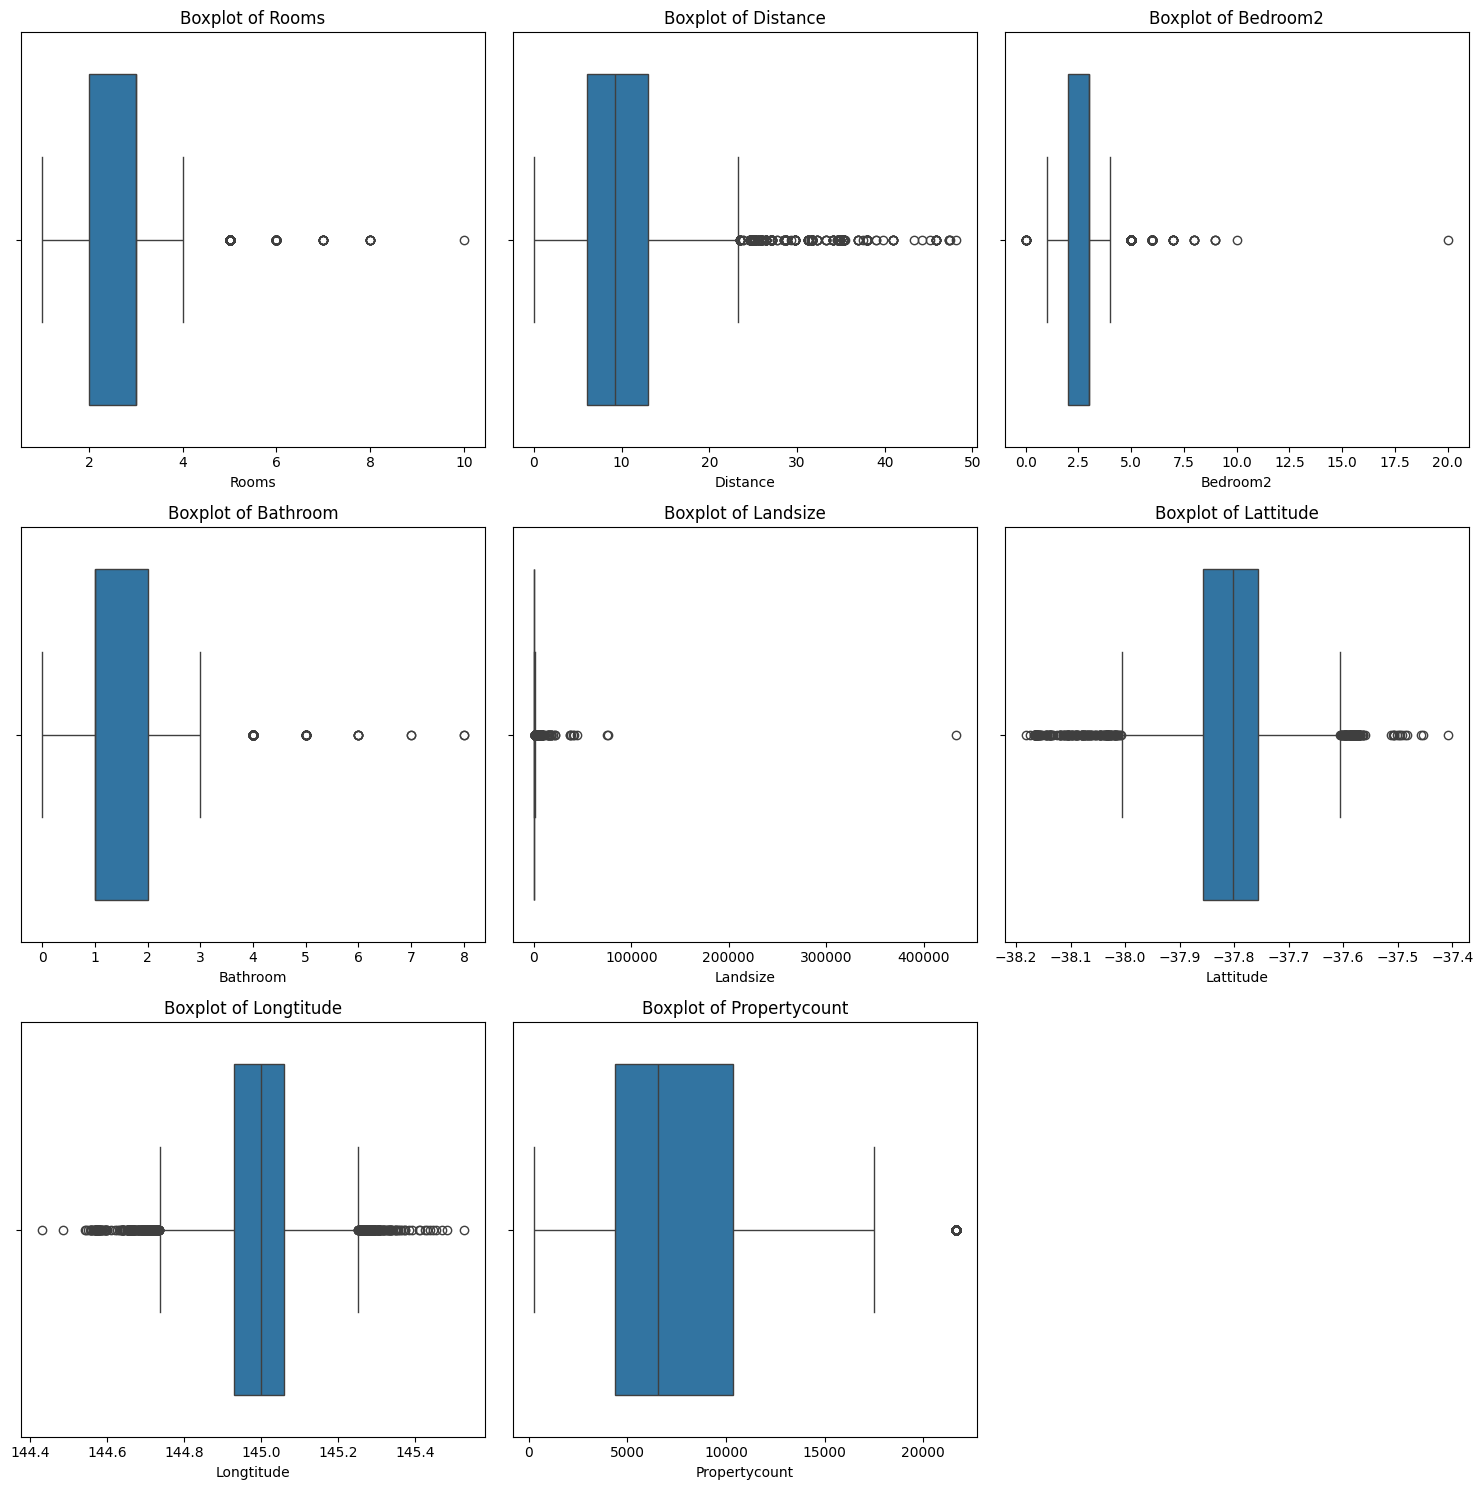

In [2287]:
columns_to_plot = [
    column for column in housing_data.select_dtypes(include=['float64', 'int64']).columns
    if column not in ['Price', 'Postcode', 'Car', 'BuildingArea', 'YearBuilt', 'Land_price_per_m2', 'Building_and_land_price_per_m2', 'YearSold']
]

# Define the grid size
n_cols = 3  # Number of plots per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten the grid to a 1D array for easier indexing

# Loop through columns and plot
for idx, column in enumerate(columns_to_plot):
    sns.boxplot(data=housing_data, x=column, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {column}')

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

#### Car

In [2288]:
# Create a data frame without NaN values in the 'Car' column
car_notna = housing_data[housing_data['Car'].notna()]

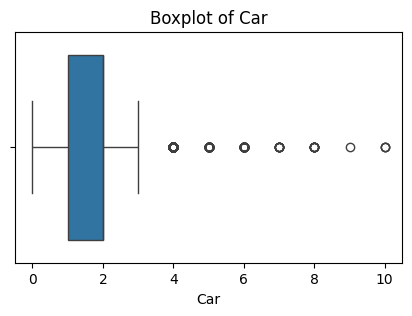

In [2289]:
# Boxplot of 'Car' column (without NaN values)
plt.figure(figsize=(5, 3))
sns.boxplot(data=car_notna, x='Car')
plt.title(f'Boxplot of Car')
plt.show()

#### YearBuilt

In [2290]:
# Create a data frame without NaN values in the 'YearBuilt' column
year_built_notna = housing_data[housing_data['BuildingArea'].notna()]

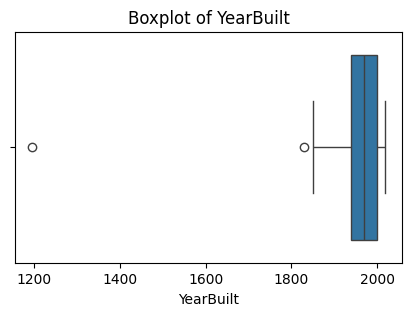

In [2291]:
# Boxplot of 'YearBuilt' column (without NaN values)
plt.figure(figsize=(5, 3))
sns.boxplot(data=year_built_notna, x='YearBuilt')
plt.title(f'Boxplot of YearBuilt')
plt.show()

### Univariate Analysis

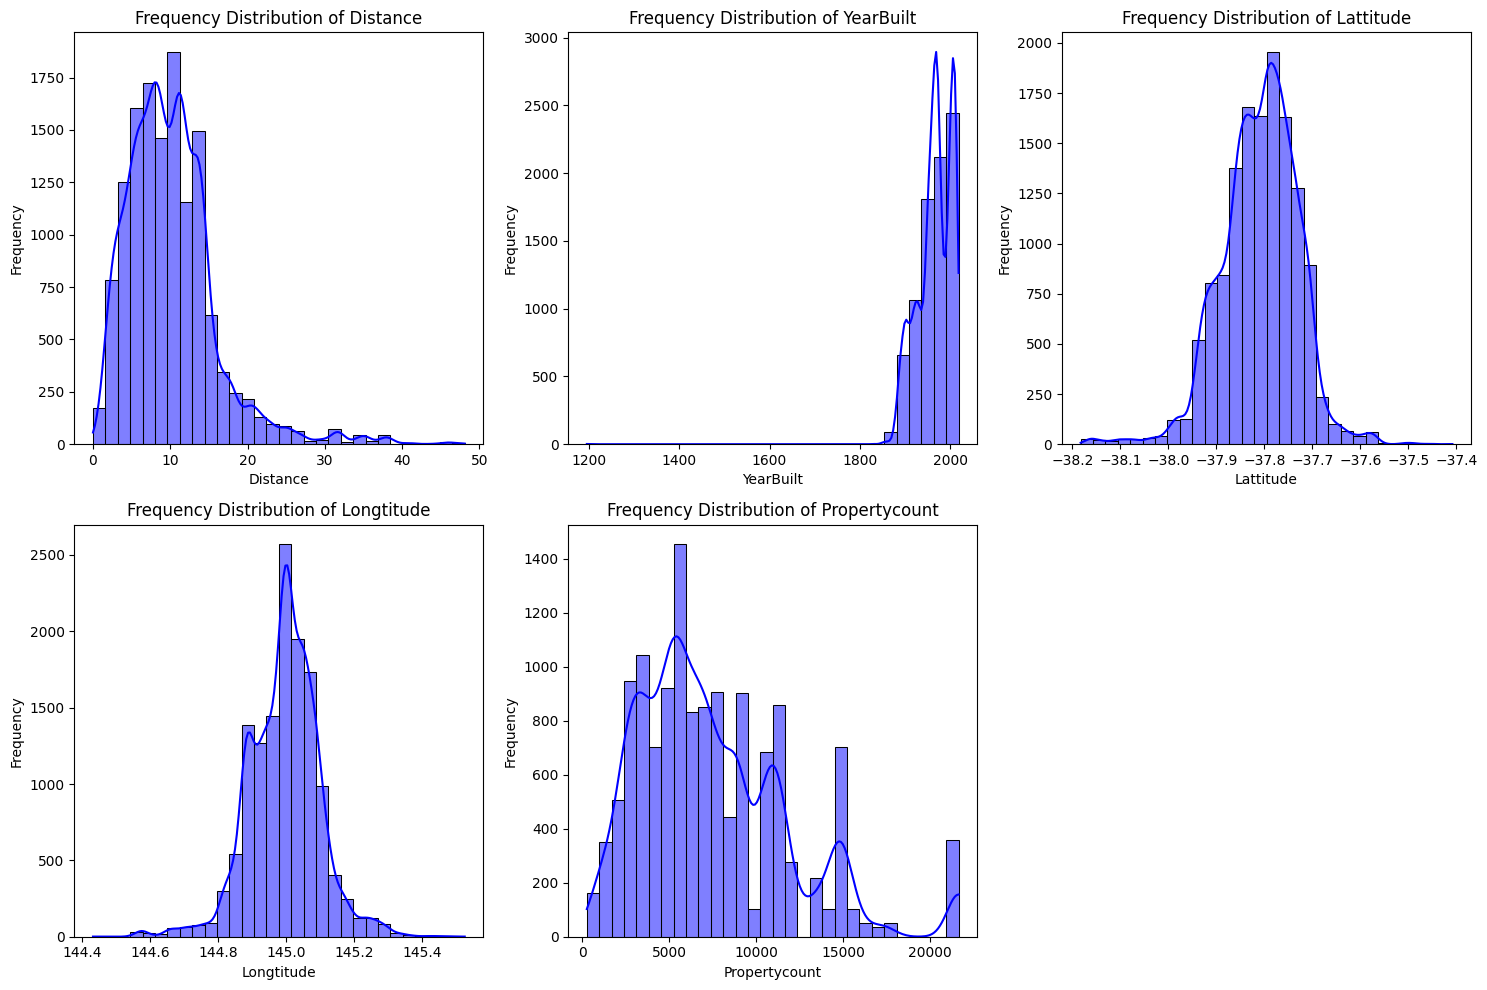

In [2292]:
columns_to_plot = ['Distance', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Define the grid size
n_cols = 3  # Number of plots per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten the grid to a 1D array for easier indexing

# Loop through columns and plot
for idx, column in enumerate(columns_to_plot):
    sns.histplot(data=housing_data, x=column, kde=True, bins=30, color='blue', ax=axes[idx])
    axes[idx].set_title(f'Frequency Distribution of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Analysis

Price vs. Type of property

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\881301934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')


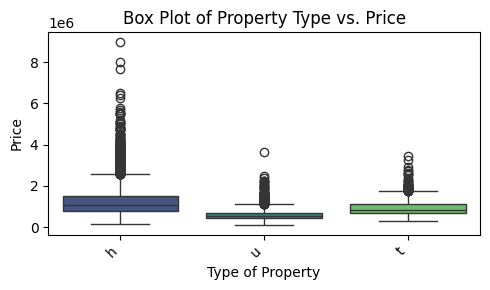

In [2293]:
# Create a boxplot of 'Type' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Type', y='Price', palette='viridis')
plt.title('Box Plot of Property Type vs. Price')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Method vs. Price

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\3217142432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')


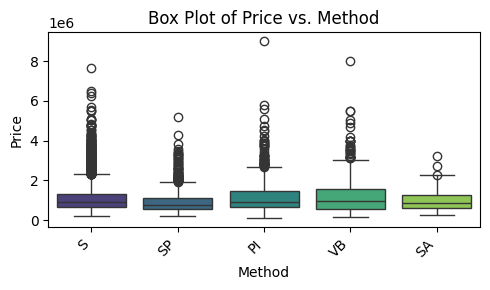

In [2294]:
# Create a boxplot of 'Method' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Method', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Method')
plt.xlabel('Method')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Region Name vs. Price

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\1943149377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')


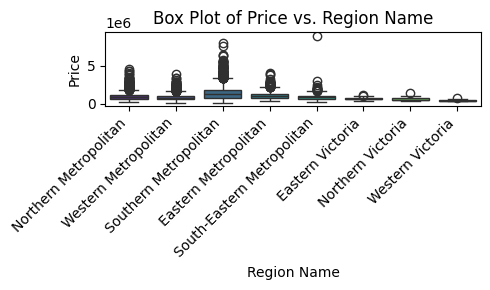

In [2295]:
# Create a boxplot of 'Regionname' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Regionname', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Region Name')
plt.xlabel('Region Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bedroom2 vs Price

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\1495222477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')


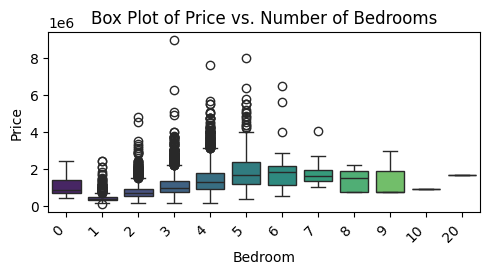

In [2296]:
# Create a boxplot of 'CouncilArea' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Bedroom2', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bedrooms')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bathrooms vs. Price

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\1684374100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')


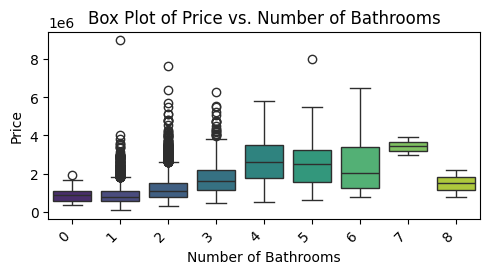

In [2297]:
# Boxplot of 'Bathroom' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Bathroom', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

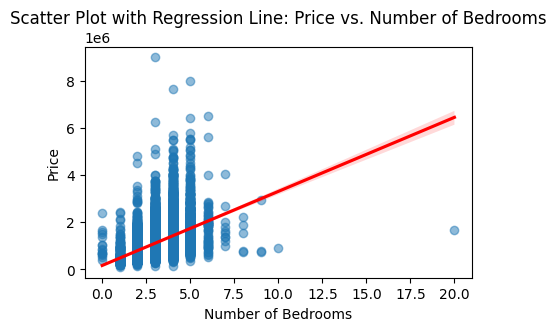

In [2298]:
plt.figure(figsize=(5, 3))
sns.regplot(data=housing_data, x='Bedroom2', y='Price', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line: Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Price vs Car Space

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\1606626617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=housing_data, x='Car', y='Price', palette='viridis')


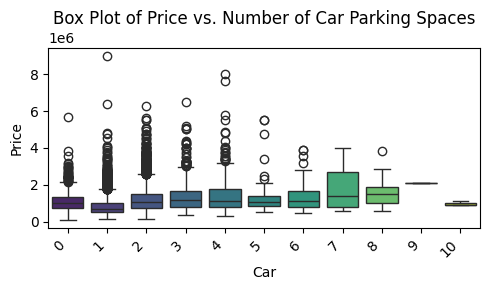

In [2299]:
# Create a boxplot of 'Car' vs. 'Price'
plt.figure(figsize=(5, 3))
sns.boxplot(data=housing_data, x='Car', y='Price', palette='viridis')
plt.title('Box Plot of Price vs. Number of Car Parking Spaces')
plt.xlabel('Car')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Price vs Landsize

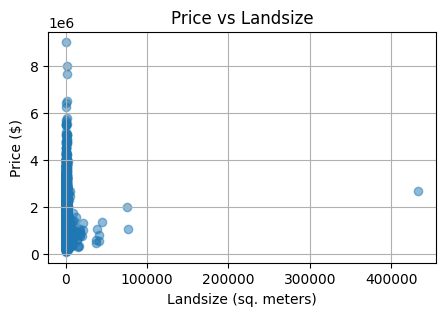

In [2300]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Landsize'], housing_data['Price'], alpha=0.5)
plt.title("Price vs Landsize")
plt.xlabel("Landsize (sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Landsize)

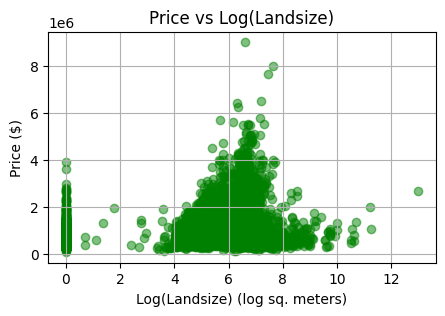

In [2301]:
housing_data['Log_Landsize'] = np.log1p(housing_data['Landsize'])


plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Log_Landsize'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Landsize)")
plt.xlabel("Log(Landsize) (log sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Distance 

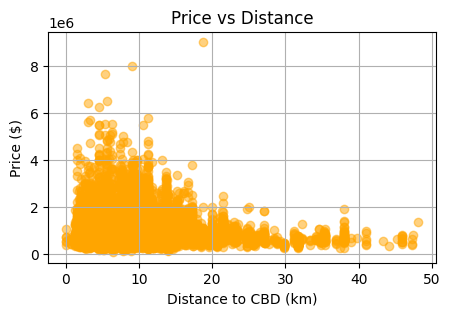

In [2302]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Distance'], housing_data['Price'], alpha=0.5, color='orange')
plt.title("Price vs Distance")
plt.xlabel("Distance to CBD (km)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Distance)

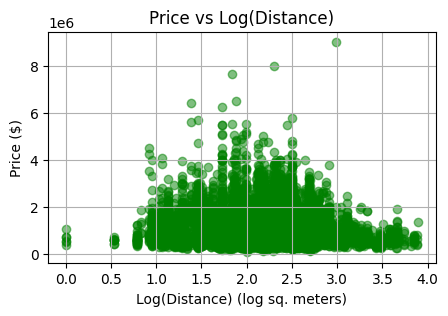

In [2303]:
housing_data['Log_Distance'] = np.log1p(housing_data['Distance'])


plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Log_Distance'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Distance)")
plt.xlabel("Log(Distance) (log sq. meters)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Propertycount

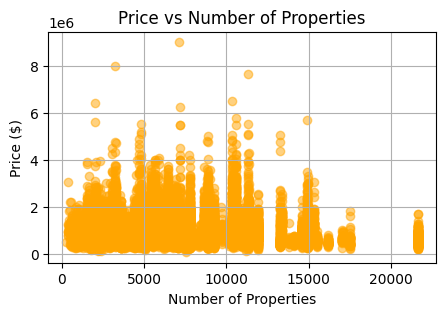

In [2304]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Propertycount'], housing_data['Price'], alpha=0.5, color='orange')
plt.title("Price vs Number of Properties")
plt.xlabel("Number of Properties")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Propertycount)

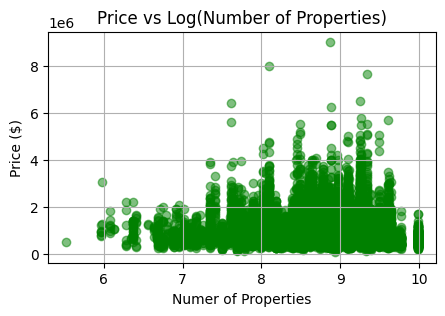

In [2305]:
housing_data['Log_Property_Count'] = np.log1p(housing_data['Propertycount'])


plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Log_Property_Count'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Number of Properties)")
plt.xlabel("Numer of Properties")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs Building Area

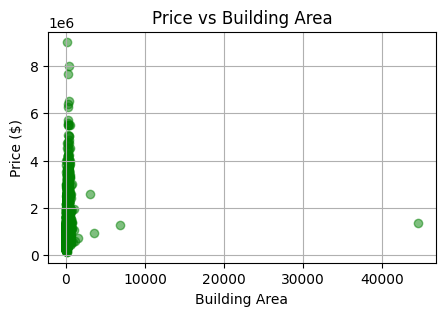

In [2306]:
plt.figure(figsize=(5, 3))
plt.scatter(housing_data['BuildingArea'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Building Area")
plt.xlabel("Building Area")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Price vs log(Building Area)

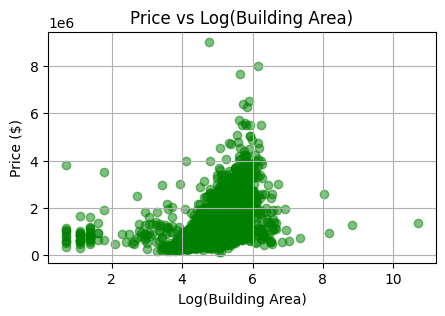

In [2307]:
housing_data['Log_Building_Area'] = np.log1p(housing_data['BuildingArea'])


plt.figure(figsize=(5, 3))
plt.scatter(housing_data['Log_Building_Area'], housing_data['Price'], alpha=0.5, color='green')
plt.title("Price vs Log(Building Area)")
plt.xlabel("Log(Building Area)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

Building Area vs Region Name

C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\2945745133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Figure size 500x300 with 0 Axes>

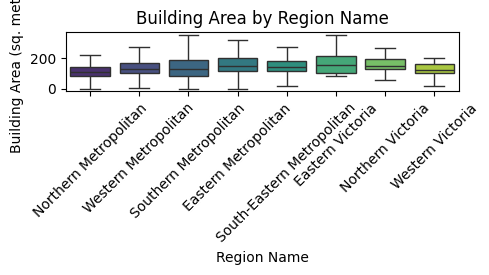

In [2308]:
plt.figure(figsize=(5, 3))
plt.figure(figsize=(5, 3))
sns.boxplot(
    x='Regionname', 
    y='BuildingArea', 
    data=housing_data, 
    palette='viridis', 
    showfliers=False
)
plt.title("Building Area by Region Name")
plt.suptitle("")  # Remove the automatic subplot title
plt.xlabel("Region Name")
plt.ylabel("Building Area (sq. meters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Housing Prices by Region - **before data imputation**

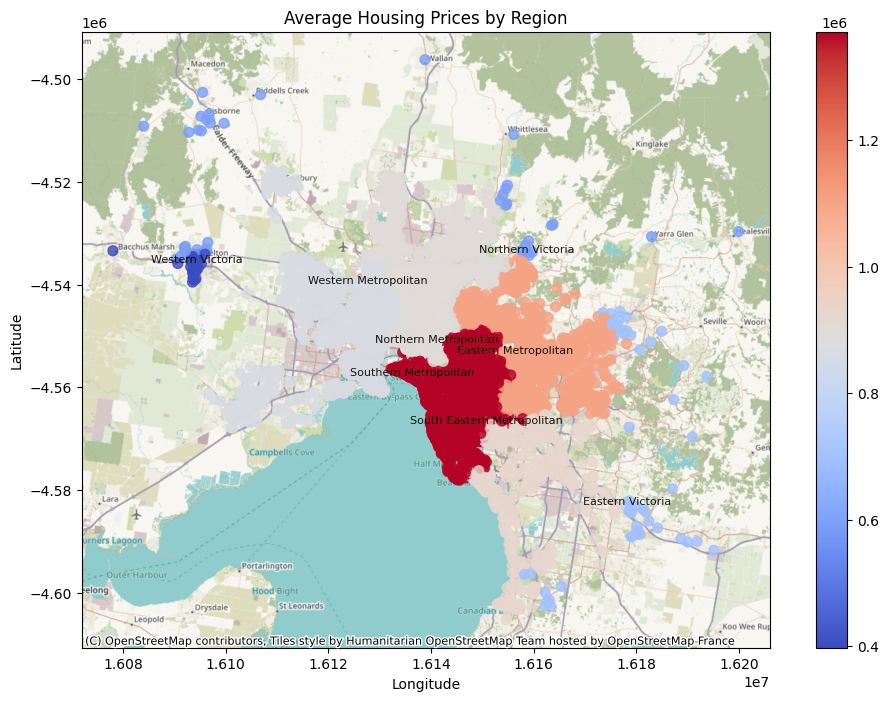

In [2309]:
# Step 1: Drop rows with missing values for specified columns
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 2: Calculate the average price per region
average_price_per_region = housing_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 3: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326"
)

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=3857)

# Step 5: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=50, alpha=0.8)

# Add a single label for each region by dropping duplicate labels based on 'Regionname'
unique_labels = gdf.drop_duplicates(subset='Regionname')
for x, y, label in zip(unique_labels.geometry.x, unique_labels.geometry.y, unique_labels['Regionname']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black', alpha=0.9)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Spatial Distribution of Property Prices in Equally Thick Rings from CBD - **before data imputation**

***RING PART IS MISSING!!!!**

### Filtering outliers using upper and lower bound

In [2310]:
def finding_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# 'LandSize' outliers
outliers_landsize = finding_outliers(housing_data, 'Landsize')
print(outliers_landsize['Landsize'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_landsize['Landsize'].count())
print('\n\n')

# 'YearBuilt' outliers
outliers_yearbuilt = finding_outliers(housing_data, 'YearBuilt')
print(outliers_yearbuilt['YearBuilt'].sort_values(ascending=False), '\n\n sum of outliers:', outliers_yearbuilt['YearBuilt'].count())

11020    433014.0
10504     76000.0
687       75100.0
13245     44500.0
5194      41400.0
           ...   
4028       1388.0
11302      1388.0
9976       1382.0
5616       1369.0
656        1364.0
Name: Landsize, Length: 368, dtype: float64 

 sum of outliers: 368



2554    1850
4843    1850
5860    1850
5405    1850
2079    1830
9968    1196
Name: YearBuilt, dtype: Int64 

 sum of outliers: 6


In [2311]:
# Identify the indices of the outliers
outliers_indices = set(outliers_landsize.index).union(set(outliers_yearbuilt.index))

# Remove the outliers from the original dataset
housing_data_no_outliers = housing_data.drop(index=outliers_indices).reset_index(drop=True)

# Display the cleaned dataset
housing_data_no_outliers.head()

housing_data = housing_data_no_outliers

## Handling Missing Data

In [2312]:
print("\nPre-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_percentage = missing_percentage.round(2)
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)



Pre-Cleaning Missing Data:


Missing Count  Missing Percentage
BuildingArea                6258               47.45
Log_Building_Area           6258               47.45
YearBuilt                   5232               39.67
CouncilArea                 1317                9.98
Car                           59                0.45

### Identifying Patterns of Missingness

#### Patterns of Missingness
**MCAR (Missing Completely at Random)** <br>
Missing values are entirely random, unrelated to other variables or the missing variable itself.

**MAR (Missing at Random)** <br>
Missingness is related to other observed variables but not the missing variable.

**MNAR (Missing Not at Random)** <br>
Missingness is related to the value of the variable itself.

#### Missing Data Visulization

**Heatmap of Missing Data** <br>

The heatmap of missing data shows that missing values are scattered across the features Car, BuildingArea, YearBuilt, and CouncilArea, with some clustering in specific rows, indicating potential patterns in missingness.


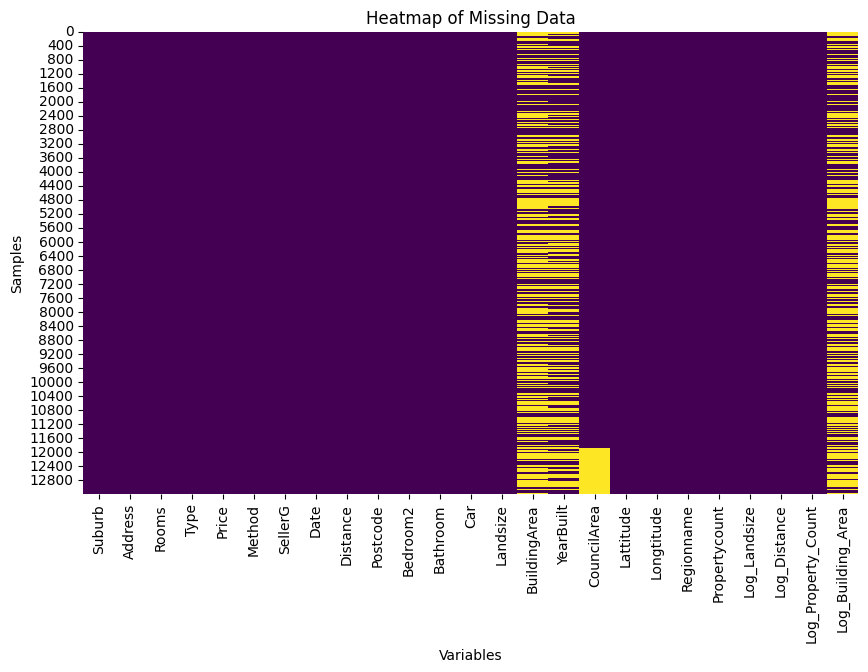

In [2313]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Data")
plt.xlabel("Variables")
plt.ylabel("Samples")
plt.show()

**Correlation Matrix of Missingness between Variables** <br>

The correlation matrix shows a strong positive correlation (0.77) between the missingness of 'BuildingArea' and 'YearBuilt', suggesting that missing values in these two variables are likely related, potentially due to shared data collection or record-keeping processes. Other variables, such as 'Car' and 'CouncilArea', show weak or no correlations, indicating independent missingness patterns.

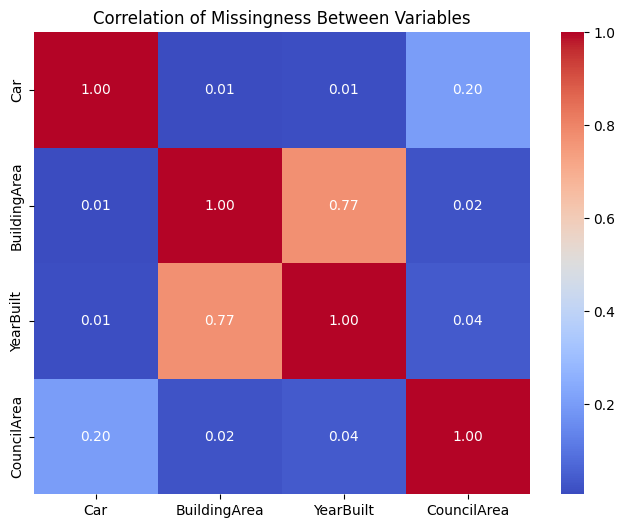

In [2314]:
# Correlation Matrix of between Variables with missing data
def plot_missingness_correlation(data, features_with_missingness):
    missing_corr = data[features_with_missingness].isnull().astype(int).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation of Missingness Between Variables")
    plt.show()

features_with_missingness = ["Car", "BuildingArea", "YearBuilt", "CouncilArea"]
plot_missingness_correlation(housing_data, features_with_missingness)


From these reuslts we can infer the following patterns for the four variables:

**'Car', 'CouncilArea':  MCAR** <br>
The variables 'Car' and 'CouncilArea' have very weak or no correlations in the heatmap indicating MCAR.

**'YearBuilt' and 'BuildingArea': MAR** <br>
Correlations between missing values (e.g., 0.77 correlation between BuildingArea and YearBuilt) suggest a MAR pattern. Missing 'BuildingArea' might be explained by 'YearBuilt' (e.g., older properties may lack recorded building areas).

**Statistical Tests to check MAR assumption** <br>

There are multiple ways to test our assumptions on the type of missingness.

A very common one being Little's MCAR test. However, for large data sets, such as the one at hand, it is unsuitable due to computational complexity and the exponential growth of unique missingness patterns, making the calculations impractical and prone to errors. The high degree of freedom in the large dataset at hand leads to a lack of sensitivty of the chi-square test, resulting in a misleadingly high p-value. For large datasets, alternative methods such as subgroup analysis or visualizing missingness patterns are often more reliable. Thus, we will proceed to analyze the type of missingness using Chi-Square Tests, to test for independence between 'Building Area' and 'YearBuilt'

**Chi-Square Tests for Independence** <br>

We will run a Chi-Square Tests for Independence to test if the missingness of 'BuildinArea' is independent of 'YearBuilt' as a correlation is suggested in the correlation matrix.

In [2315]:
# Create missingness indicator for a variable
housing_data['BuildingArea_missing'] = housing_data['BuildingArea'].isnull().astype(int)

# Perform chi-square test against another observed variable
contingency_table = pd.crosstab(housing_data['BuildingArea_missing'], housing_data['YearBuilt'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check the p-value
print("P-value:", p)

P-value: 4.831947462199715e-16


The p-value of 4.44e-16 is extremely small, indicating a highly significant result. This means that the missingness of 'BuildingArea' is not independent of 'YearBuilt'. This further confirms our assumption of the values for 'BuildingArea' being MAR.

### Handling of Missing Values
Based on our prior analysis we will now continue to handle the missing values in our data set choosing a fitting approach for each of the four variables.


#### Car
From our preliminary analysis we conclude that 'Car' is MCAR. Due to the low proportion of missing values in the variable 'Car' we choose to drop all rows containing missing values.


In [2316]:
# Handle missing values in 'Car'
housing_data = housing_data.dropna(subset=['Car'])


#### CouncilArea
We conclude that 'CouncilArea' is MAR. While imputation using observed variables would be possible, we still choose to drop the column wit the variable 'CouncilArea'. This is done as the Variable will not be needed for further anlysis, due to the availability of other variables that give similar insights relating to the location of the properties.

In [2317]:
housing_data = housing_data.drop(columns=['CouncilArea'])

#### YearBuilt

Our analysis suggests that 'YearBuilt' is MAR. Thus, we perform more in-depth analysis on it's correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

In [2318]:
# Encode non-numeric columns
encoded_housing_data = housing_data.copy()
non_numeric_columns = encoded_housing_data.select_dtypes(exclude=[np.number]).columns
label_encoders = {}

for col in non_numeric_columns:
    label_encoders[col] = LabelEncoder()
    encoded_housing_data[col] = label_encoders[col].fit_transform(encoded_housing_data[col].astype(str))

# Select numeric and encoded columns
numeric_and_encoded_columns = encoded_housing_data.select_dtypes(include=[np.number])

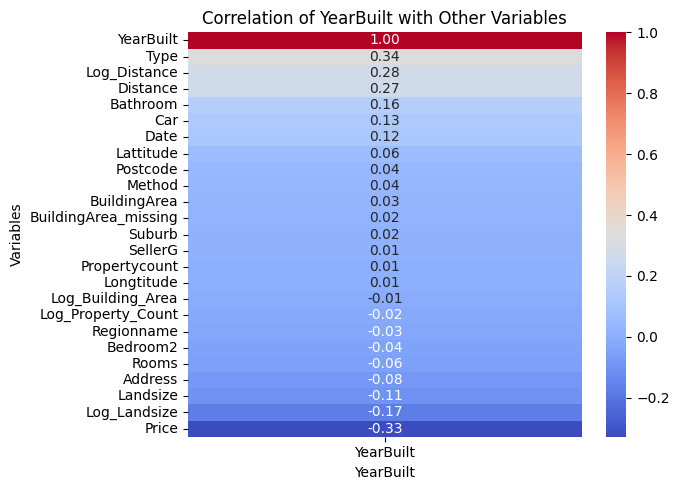

In [2319]:
# Compute correlation matrix and visualize correlations with 'YearBuilt'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['YearBuilt']].sort_values(by='YearBuilt', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of YearBuilt with Other Variables')
plt.xlabel('YearBuilt')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

As 'YearBuilt' does not correlate with any other variables over the threshold of 0.25 which would lead to impution with predictors that have a weak or no relationship with 'YearBuilt', and thus lead to values that are not meaningful or accurate. 

Hence, we proceed with other forms of imputation and check for variability across regions.

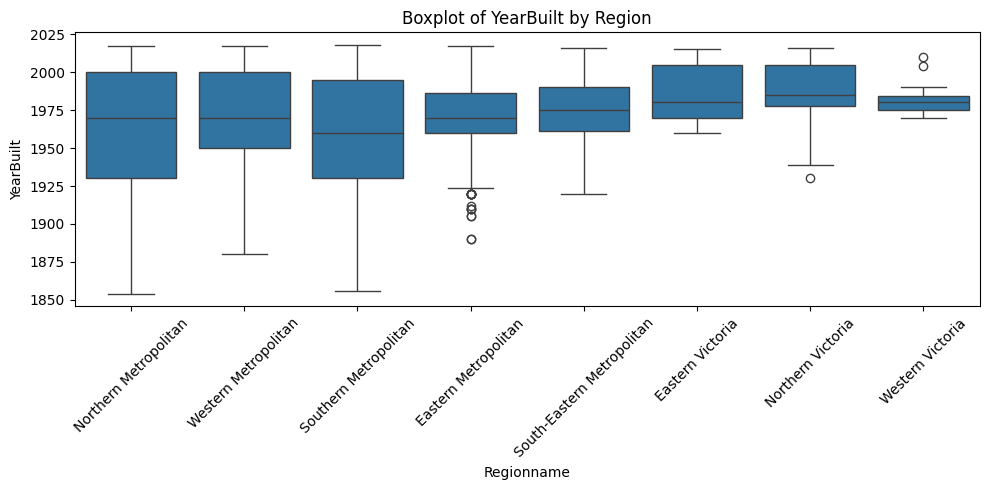

In [2320]:
# Boxplot for YearBuilt by Region to check for vraince between the different Regions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Regionname', y='YearBuilt', data=housing_data)
plt.xticks(rotation=45)
plt.title('Boxplot of YearBuilt by Region')
plt.xlabel('Regionname')
plt.ylabel('YearBuilt')
plt.tight_layout()
plt.show()

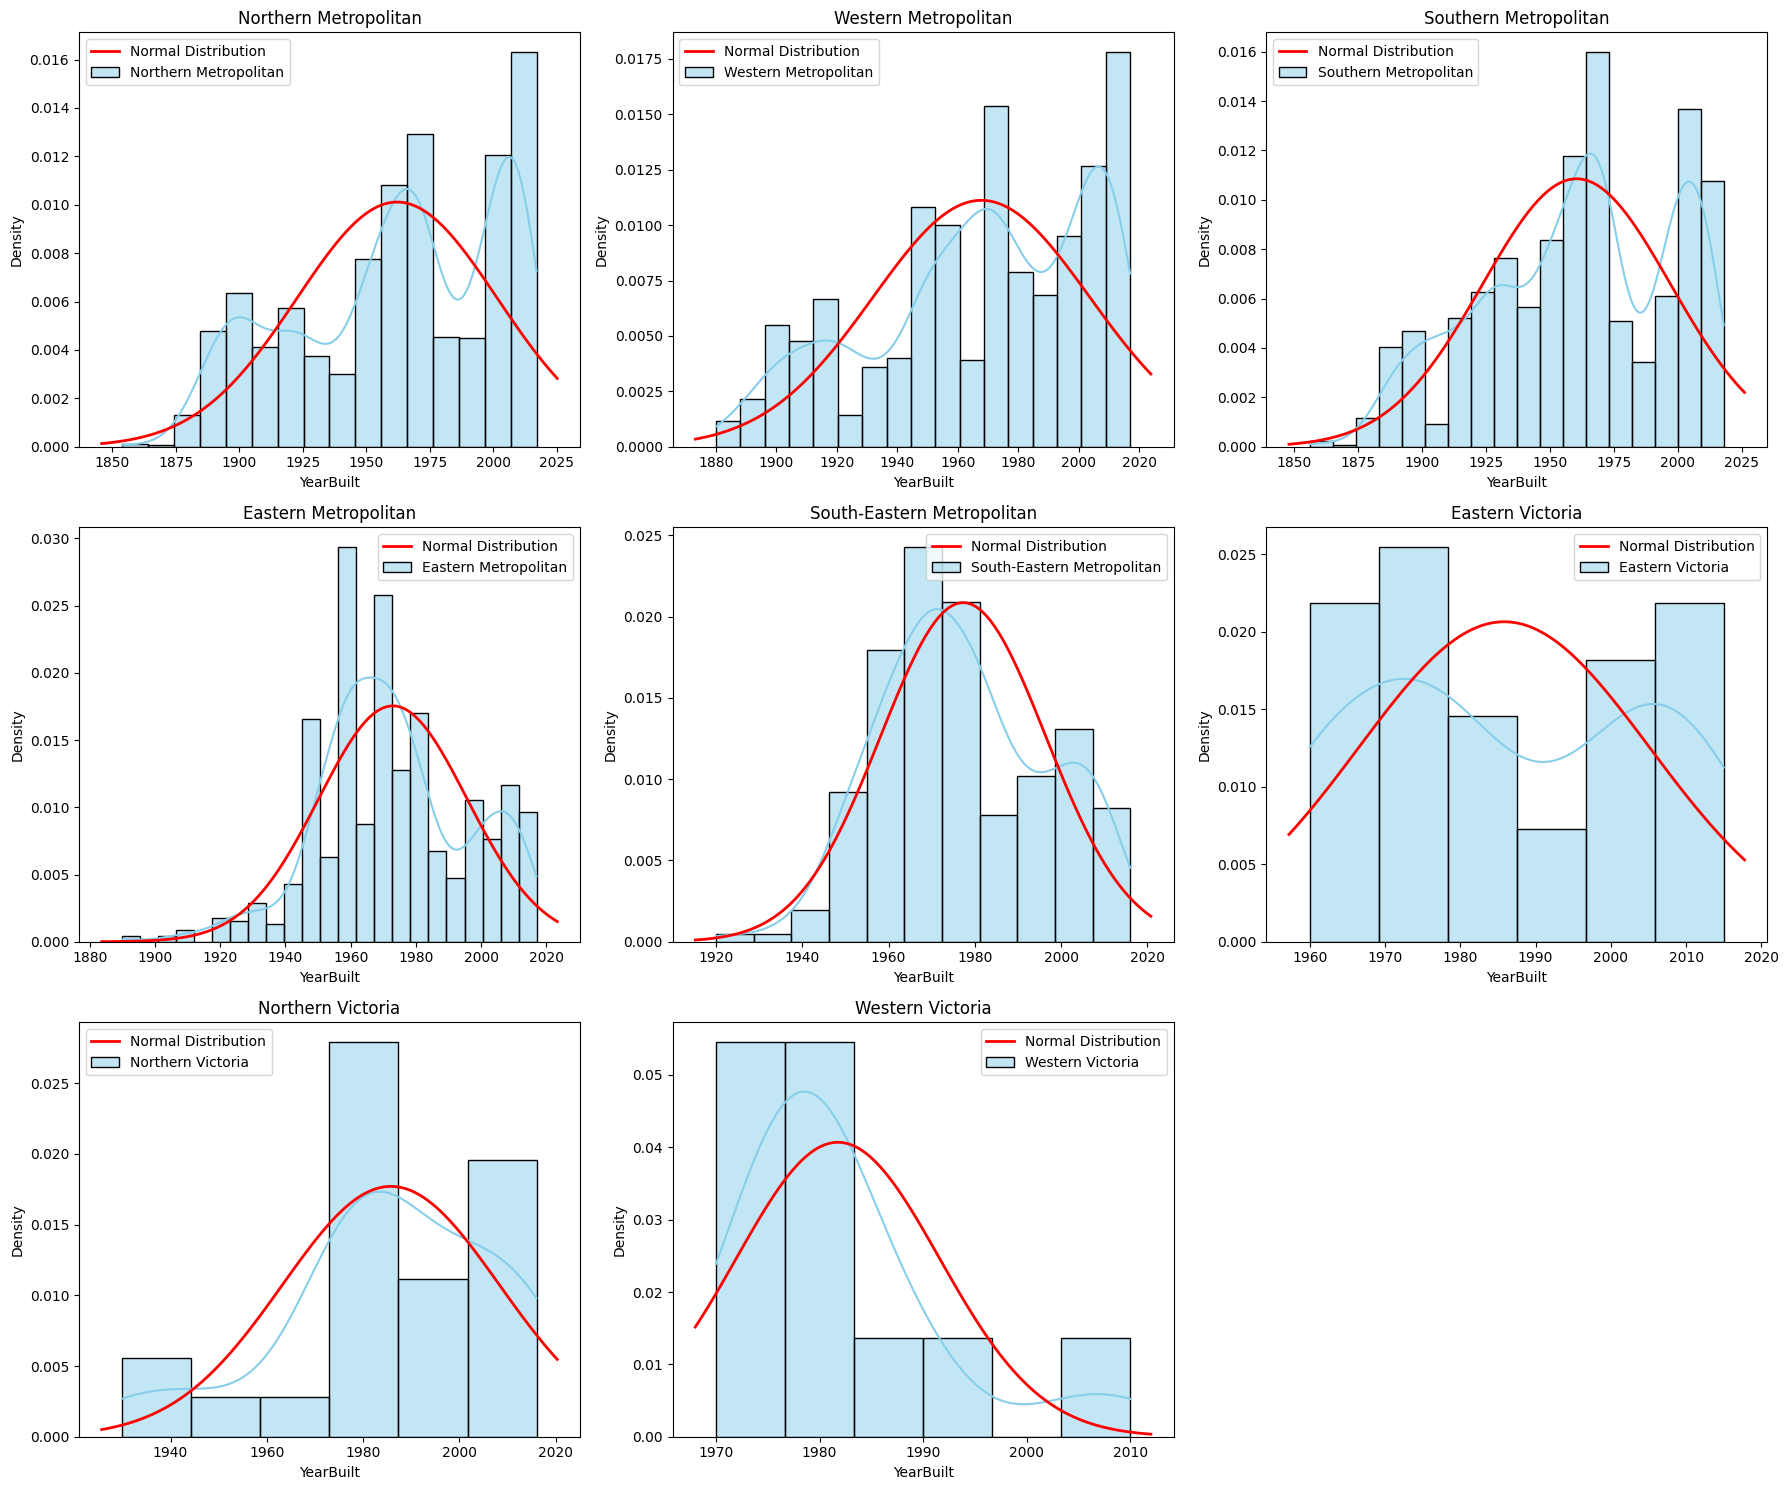

In [2321]:
# Check if YearBuilt follows a Normal distirbution
# Group the data by 'Regionname' and prepare for subplots
regions = housing_data['Regionname'].unique()
num_regions = len(regions)

# Determine the number of rows and columns for subplots
rows = int(np.ceil(num_regions / 3))
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    ax = axes[i]
    # Filter data for the specific region and drop missing YearBuilt values
    region_data = housing_data[housing_data['Regionname'] == region]['YearBuilt'].dropna()
    
    if region_data.empty:
        ax.set_title(f"{region} - No Data")
        ax.axis('off')
        continue

    # Plot histogram and normal distribution
    sns.histplot(region_data, kde=True, stat="density", color='skyblue', ax=ax, label=f"{region}")
    
    # Plot normal distribution
    mean = region_data.mean()
    std = region_data.std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2, label="Normal Distribution")
    ax.set_title(f"{region}")
    ax.legend()

# Remove empty subplots if regions are fewer than rows * cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



We can see from the plots that 'YearBuilt' does not follow a normal distribution within each region. Thus we can not impute 'YearBuilt' by drawing at random from a normal distribution. As variability within the variable is still important, we sample directly sample from the existing observed values in each region. This method ensures that the imputed values align with the actual distribution of 'YearBuilt' within each region, regardless of its shape.

In [2322]:
def random_impute_by_region(data, region_col, yearbuilt_col):
    for region in data[region_col].unique():
        # Filter non-missing values of YearBuilt for the current region
        region_data = data[data[region_col] == region][yearbuilt_col].dropna()
        
        # Check if there are non-missing values to sample from
        if not region_data.empty:
            # Count the number of missing values in YearBuilt for the current region
            missing_count = data[(data[region_col] == region) & (data[yearbuilt_col].isnull())].shape[0]
            
            # Randomly sample values from the existing distribution
            imputed_values = np.random.choice(region_data, missing_count, replace=True)
            
            # Fill the missing values with the sampled values
            data.loc[(data[region_col] == region) & (data[yearbuilt_col].isnull()), yearbuilt_col] = imputed_values

# Apply the function to the housing data
random_impute_by_region(housing_data, 'Regionname', 'YearBuilt')

# Check for remaining missing values
print("Remaining Missing Values in YearBuilt:")
print(housing_data['YearBuilt'].isnull().sum())


Remaining Missing Values in YearBuilt:
0


#### BuildingArea

Similarly to 'YearBuilt' our analysis suggests that 'BuildingArea' is MAR. Thus, we will also firt investigate the variables correlation with other variables to establish whether uisng Linear Regression or KNN is are viable imputation techniques.

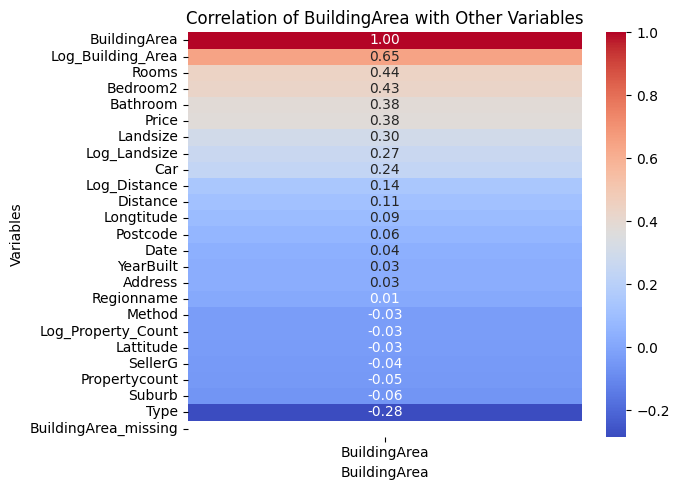

In [2323]:
# Compute correlation matrix and visualize correlations with 'BuildingArea'
correlation_matrix_encoded = numeric_and_encoded_columns.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(
    correlation_matrix_encoded[['BuildingArea']].sort_values(by='BuildingArea', ascending=False),
    annot=True, cmap='coolwarm', cbar=True, fmt=".2f"
)
plt.title('Correlation of BuildingArea with Other Variables')
plt.xlabel('BuildingArea')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

We can see that 'BuildingArea' correlates with five other variables, namely 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type', above the threshold of 0.25. Thus, we will continue to use KNN to impute missing values for 'BuildingArea'.

**K-Nearest Neighbors (KNN) Imputation** <br>

Firstly, we perform an optimization to find the optimal number of K neighbors to use.

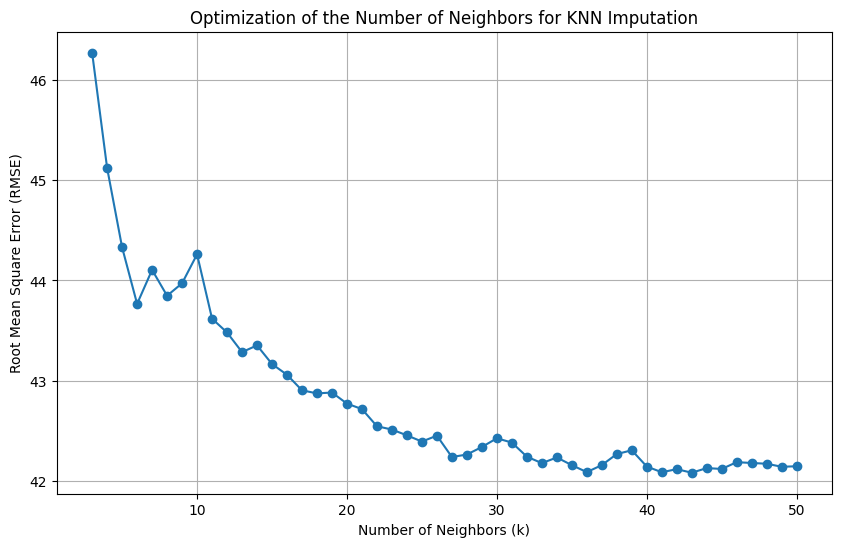

Optimal number of neighbors: 43


In [2324]:
# Imputation of BuildingArea using KNN - using variables with a correlation of >= 0.25 (except price)
# Select relevant columns for testing imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Remove rows with missing values for testing
complete_data = housing_data_encoded.dropna(subset=columns_for_imputation)

# Split into train and test
train_data, test_data = train_test_split(complete_data, test_size=0.2, random_state=42)

# Introduce artificial missingness in the 'BuildingArea' column for testing
test_data_missing = test_data.copy()
mask = np.random.rand(len(test_data)) < 0.3  # Mask 30% of the values
test_data_missing.loc[mask, 'BuildingArea'] = np.nan

# Optimize n_neighbors
errors = []
n_neighbors_range = range(3, 51)

for k in n_neighbors_range:
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=k)
    imputed_data = knn_imputer.fit_transform(test_data_missing[columns_for_imputation])
    
    # Calculate error
    imputed_values = imputed_data[:, 0]  # Imputed 'BuildingArea'
    true_values = test_data['BuildingArea'].values
    error = root_mean_squared_error(true_values, imputed_values)
    errors.append(error)

# Plot errors to find the optimal n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, errors, marker='o')
plt.title("Optimization of the Number of Neighbors for KNN Imputation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Square Error (RMSE)")
plt.grid()
plt.show()

# Best n_neighbors
best_k = n_neighbors_range[np.argmin(errors)]
print(f"Optimal number of neighbors: {best_k}")



Using the optimal numbers of neigbors K we impute the missing values in 'BuildingArea'.

In [2325]:
# Use KNN to impute BuildingArea based on variables with a correlation threshold of >= 0.25 (except Price)
# Select relevant columns for imputation
columns_for_imputation = ['BuildingArea', 'Rooms', 'Bedroom2', 'Bathroom', 'Landsize', 'Type']
housing_data_encoded = housing_data.copy()

# Encode non-numeric columns to include in KNN
if 'Type' in columns_for_imputation:
    housing_data_encoded['Type'] = housing_data_encoded['Type'].astype('category').cat.codes

# Apply KNN imputation to selected columns
knn_imputer = KNNImputer(n_neighbors=best_k)
imputed_data = knn_imputer.fit_transform(housing_data_encoded[columns_for_imputation])

# Update the original DataFrame with imputed values
housing_data.loc[:, 'BuildingArea'] = imputed_data[:, 0]

# Check for remaining missing values in 'BuildingArea'
print("Remaining Missing Values in BuildingArea:")
print(housing_data['BuildingArea'].isnull().sum())


Remaining Missing Values in BuildingArea:
0


After handling the missing data in all four columns, we perform a final check to confirm that there are in fact no  missing values left in our data set.


In [2326]:
print("\nPost-Cleaning Missing Data:")
missing_data = housing_data.isnull().sum()
missing_percentage = (missing_data / len(housing_data)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False))


Post-Cleaning Missing Data:
                   Missing Count  Missing Percentage
Log_Building_Area           6227           47.422131


### 1.2 Other Data Cleaning

In [2327]:
# Check for invalid entires in Landsize (where Landsize = 0)
landsizes_equal_zero = (housing_data['Landsize'] == 0).sum()
print(f"Number of Landsize values equal to 0: {landsizes_equal_zero}")

Number of Landsize values equal to 0: 1937


In [2328]:
# Update Landsize to be equal to BuildingArea where Landsize is 0
housing_data.loc[housing_data['Landsize'] == 0, 'Landsize'] = housing_data['BuildingArea']
housing_data[['BuildingArea', 'Landsize']]

BuildingArea  Landsize
0        118.737209     202.0
1         79.000000     156.0
2        150.000000     134.0
3         99.674419      94.0
4        142.000000     120.0
...             ...       ...
13185    202.801163     652.0
13186    133.000000     333.0
13187    163.046512     436.0
13188    157.000000     866.0
13189    112.000000     362.0

[13131 rows x 2 columns]

In [2329]:
# Convert the date into a discrete number
housing_data['time'] = housing_data['Date'].apply(lambda x: x.year * 365 + x.month * 12 + x.day * 30)

# Normalize the time column
housing_data['time_cont'] = (housing_data['time'] - housing_data['time'].min()) / (housing_data['time'].max() - housing_data['time'].min())

# Display the updated dataset's first few rows to confirm the addition
print(f"Normalized time: \n{housing_data[['Date', 'time', 'time_cont']].head()}\n")

# Show the latest and oldest time
latest_time = housing_data['time_cont'].max()
oldest_time = housing_data['time_cont'].min()

print(f"Latest time: {latest_time}")
print(f"Oldest time: {oldest_time}")


Normalized time: 
        Date    time  time_cont
0 2016-12-03  736074   0.076596
1 2016-02-04  735984   0.000000
2 2017-03-04  736361   0.320851
3 2017-03-04  736361   0.320851
4 2016-06-04  736032   0.040851

Latest time: 1.0
Oldest time: 0.0


In [2330]:
# Add cosine of time_cont
housing_data['time_cos'] = np.cos(2 * np.pi * housing_data['time_cont'])

# Add a column with the square of time_cont
housing_data['time_sq'] = housing_data['time_cont'] ** 2

# Display the updated dataset's first few rows to confirm the addition
housing_data[['time_cont', 'time_cos', 'time_sq']].head()


time_cont  time_cos   time_sq
0   0.076596  0.886410  0.005867
1   0.000000  1.000000  0.000000
2   0.320851 -0.430612  0.102945
3   0.320851 -0.430612  0.102945
4   0.040851  0.967239  0.001669

In [2331]:
# Dropping unnecessary columns
columns_to_drop = ['Land_price_per_m2', 'Building_and_land_price_per_m2']
housing_data = housing_data.drop(columns=columns_to_drop, errors='ignore')

## 2. Exploratory Data Analysis (EDA)

In [2332]:
# Get an overview of the cleaned dataset
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13131 entries, 0 to 13189
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Suburb                13131 non-null  object        
 1   Address               13131 non-null  object        
 2   Rooms                 13131 non-null  int64         
 3   Type                  13131 non-null  object        
 4   Price                 13131 non-null  float64       
 5   Method                13131 non-null  object        
 6   SellerG               13131 non-null  object        
 7   Date                  13131 non-null  datetime64[ns]
 8   Distance              13131 non-null  float64       
 9   Postcode              13131 non-null  Int64         
 10  Bedroom2              13131 non-null  Int64         
 11  Bathroom              13131 non-null  Int64         
 12  Car                   13131 non-null  Int64         
 13  Landsize             

## Correlation Matrix - initial analysis

In [2333]:
numeric_columns = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                   'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
categorical_columns = ['Type', 'Method', 'SellerG']

# Numeric vs Numeric Correlation
numeric_correlation = housing_data[numeric_columns].corr()

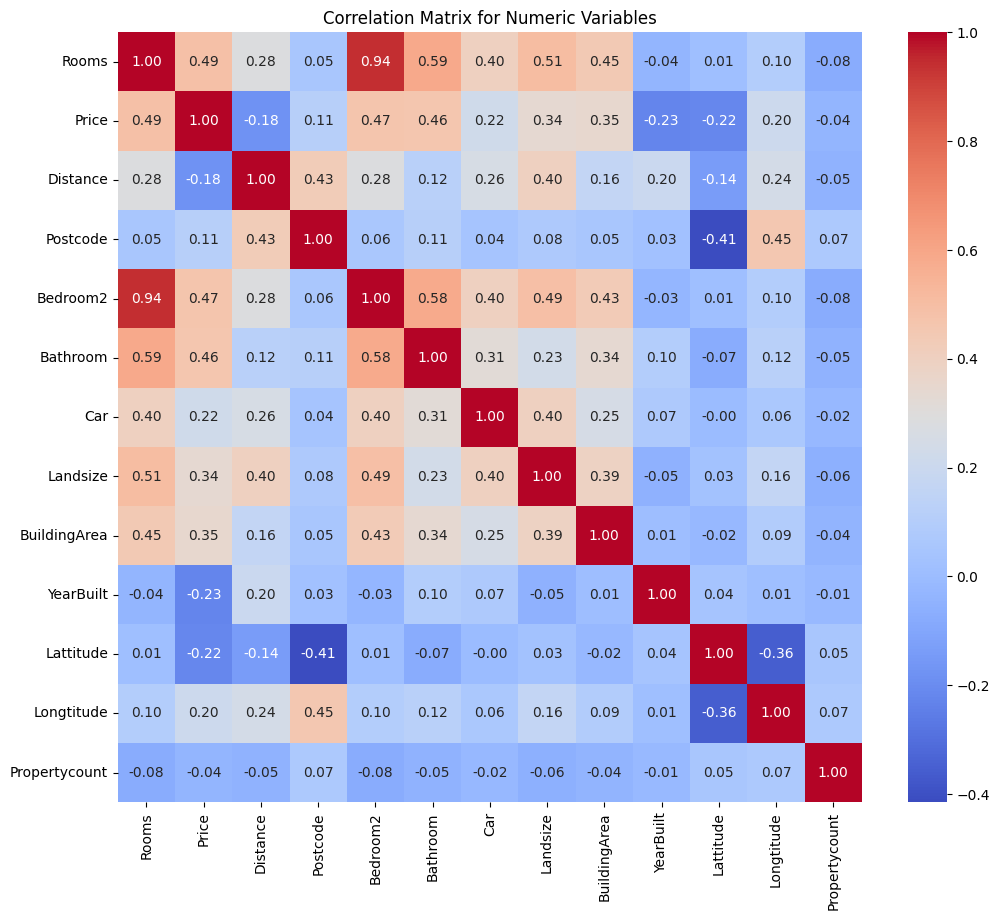

In [2334]:
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Numeric Variables")
plt.show()

#### Highly correlated variables - **over the threshold of 0.5**

In [2335]:
# Find pairs of variables with high correlation
threshold = 0.5

high_correlation = (numeric_correlation.abs() >= threshold)

high_corr_pairs = [
    (var1, var2) for var1 in high_correlation.index for var2 in high_correlation.columns
    if high_correlation.loc[var1, var2] and var1 != var2
]


high_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)


high_corr_pairs_sorted = sorted(list(high_corr_pairs))
high_corr_pairs_sorted

[('Bathroom', 'Bedroom2'),
 ('Bathroom', 'Rooms'),
 ('Bedroom2', 'Rooms'),
 ('Landsize', 'Rooms')]

## Regional Price Analysis

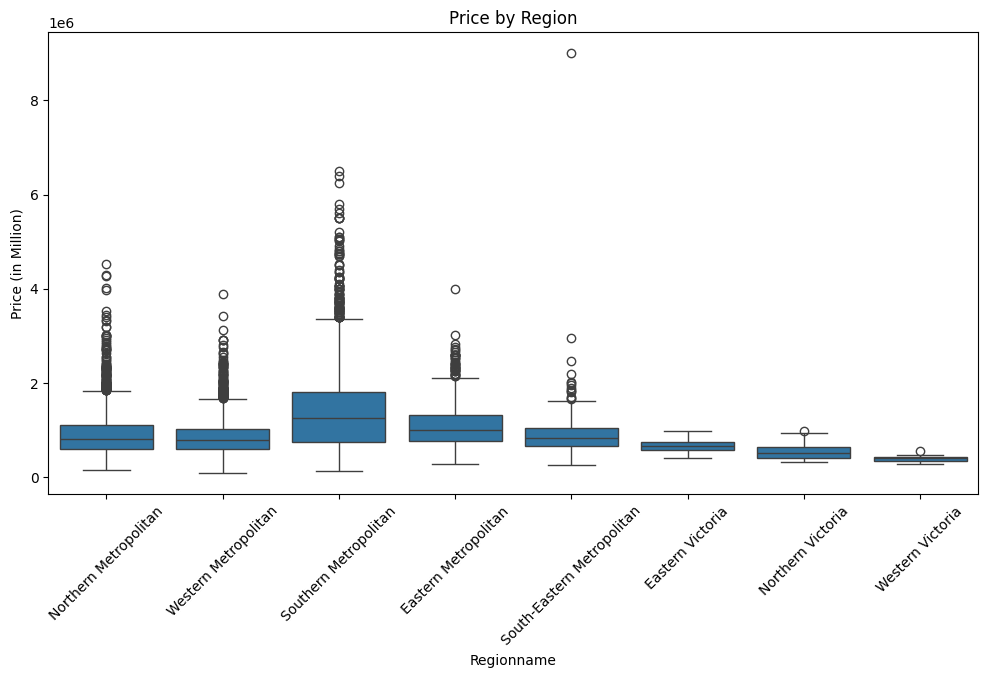

In [2336]:
# Boxplots by Regions
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Regionname', y = 'Price', data = housing_data)
plt.xticks(rotation = 45)
plt.title("Price by Region")
plt.ylabel('Price (in Million)')
plt.show()

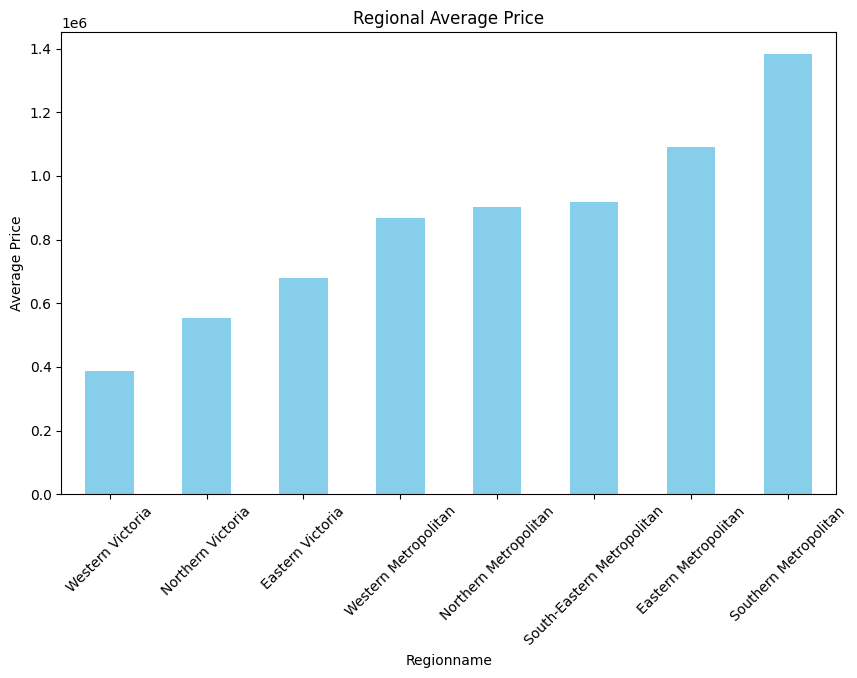

In [2337]:
# Barplot of average price per region
# Group by region and calculate mean price per sqm
region_avg = housing_data.groupby('Regionname')['Price'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.title("Regional Average Price")
plt.xticks(rotation=45)
plt.show()

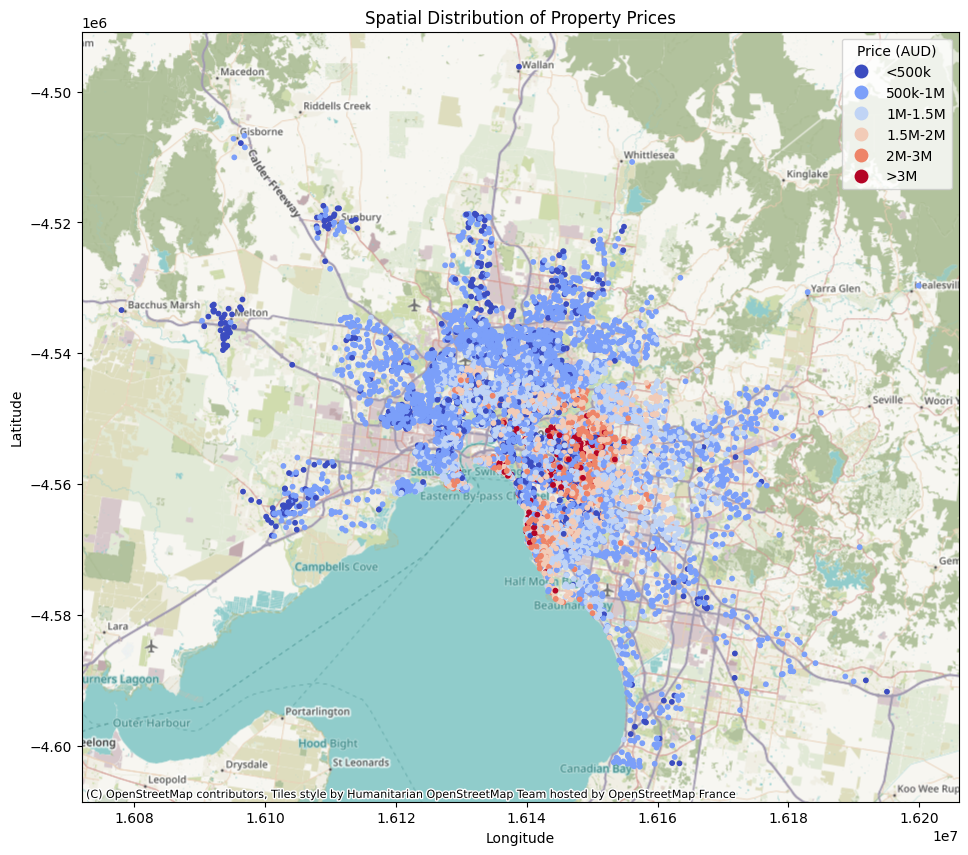

In [2338]:
# Spatial Distribution of Property Prices
# Filter valid data for mapping
geo_data = housing_data[['Lattitude', 'Longtitude', 'Price']]
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Categorize prices into ranges (bins)
price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, gdf['Price'].max()]
price_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-3M', '>3M']
gdf['Price Range'] = pd.cut(gdf['Price'], bins=price_bins, labels=price_labels)

# Plot the map with categorized price ranges
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Price Range', legend=True, cmap='coolwarm', markersize=10, categorical=True)

# Add title to the legend
legend = ax.get_legend()
legend.set_title("Price (AUD)")

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

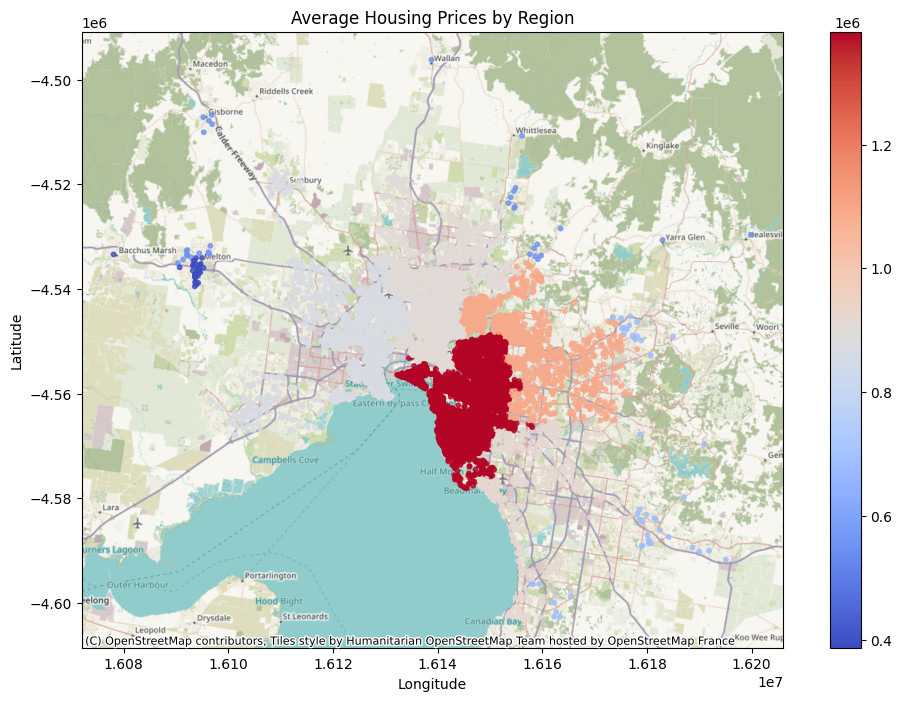

In [2339]:
# Step 2: Data cleaning
# Drop rows with missing values in critical columns
filtered_data = housing_data.dropna(subset=['Price', 'Lattitude', 'Longtitude', 'Regionname'])

# Step 3: Calculate the average price per region
average_price_per_region = filtered_data.groupby('Regionname')['Price'].mean().reset_index()

# Step 4: Merge the average prices back to include spatial data
region_geo = filtered_data[['Regionname', 'Lattitude', 'Longtitude']].drop_duplicates()
merged_data = region_geo.merge(average_price_per_region, on='Regionname')

# Step 5: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_data,
    geometry=gpd.points_from_xy(merged_data['Longtitude'], merged_data['Lattitude']),
    crs="EPSG:4326")  # WGS 84 Coordinate Reference System


# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Step 7: Plot the data on a basemap
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, column='Price', cmap='coolwarm', legend=True, markersize=10, alpha=0.8)

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Average Housing Prices by Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [2340]:
# Filter properties that are closest to the CBD (e.g., within 1 km)
cbd_properties = housing_data[housing_data['Distance'] <= 1]

# Calculate the average latitude and longitude of these properties
cbd_latitude = cbd_properties['Lattitude'].mean()
cbd_longitude = cbd_properties['Longtitude'].mean()

print(f"Latitude of CBD: {cbd_latitude}")
print(f"Longitude of CBD: {cbd_longitude}")

Latitude of CBD: -37.818399
Longitude of CBD: 144.963525


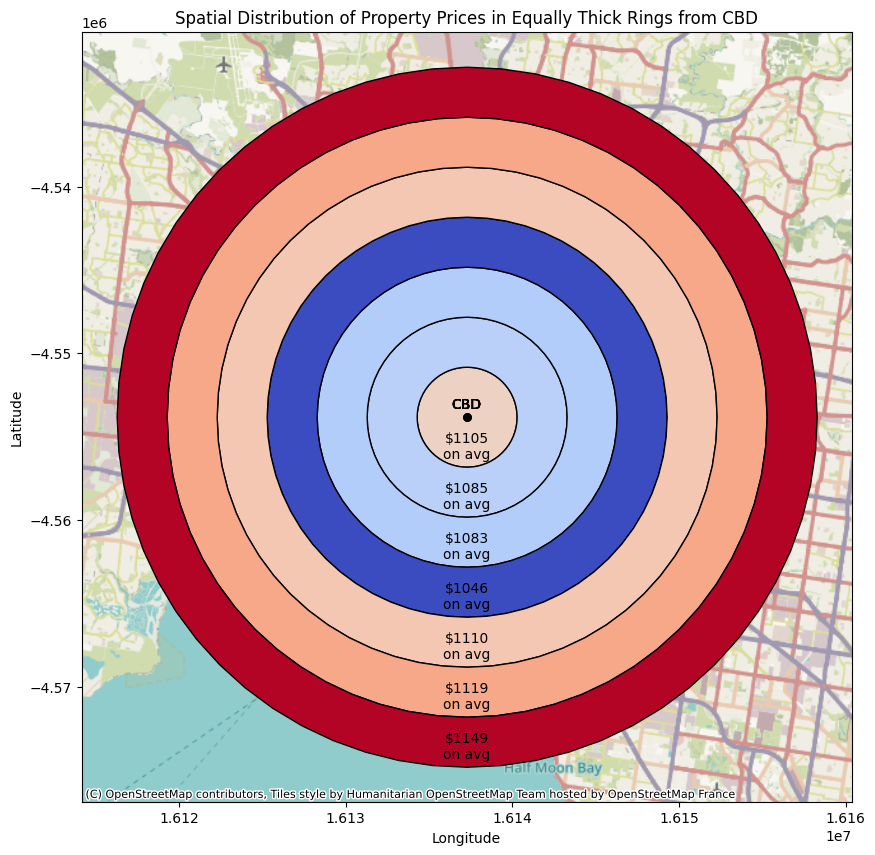

In [2341]:
# Define the CBD point
cbd_point = Point(cbd_longitude, cbd_latitude)

# Define the distance intervals (in km) for equally thick rings
ring_thickness = 3  # Thickness of each ring in km
num_rings = 7  # Number of rings
distance_intervals = [ring_thickness * (i + 1) for i in range(num_rings)]

# Create a GeoDataFrame for the CBD point
cbd_gdf = gpd.GeoDataFrame([{'geometry': cbd_point}], crs="EPSG:4326")

# Reproject to a metric CRS (e.g., EPSG:3857) for distance calculations
cbd_gdf = cbd_gdf.to_crs(epsg=3857)
cbd_point_metric = cbd_gdf.geometry.iloc[0]

# Create rings around the CBD point
rings = []
for i, dist in enumerate(distance_intervals):
    if i == 0:
        inner_buffer = cbd_point_metric.buffer(0)  # Inner buffer is just the point itself
    else:
        inner_buffer = cbd_point_metric.buffer(distance_intervals[i-1] * 1000)  # Convert km to meters
    outer_buffer = cbd_point_metric.buffer(dist * 1000)  # Convert km to meters
    ring = outer_buffer.difference(inner_buffer)
    rings.append(ring)

# Create a GeoDataFrame for the rings
rings_gdf = gpd.GeoDataFrame(geometry=rings, crs="EPSG:3857")

# Reproject the property data to the same CRS
gdf = gdf.to_crs(epsg=3857)

# Calculate the average price within each ring
average_prices = []
for ring in rings:
    properties_in_ring = gdf[gdf.geometry.within(ring)]
    average_price = properties_in_ring['Price'].mean()
    average_prices.append(average_price)

# Create a color map based on the average prices
norm = plt.Normalize(vmin=min(average_prices), vmax=max(average_prices))
cmap = plt.cm.coolwarm

# Plot the rings with the corresponding colors
fig, ax = plt.subplots(figsize=(12, 10))
for ring, avg_price in zip(rings, average_prices):
    color = cmap(norm(avg_price))
    ring_gdf = gpd.GeoDataFrame(geometry=[ring], crs="EPSG:3857")
    ring_gdf.plot(ax=ax, edgecolor='black', facecolor=color, linewidth=1)
    # Get the centroid of the ring for labeling
    centroid = ring.centroid
    # Get the bounds of the ring for labeling
    minx, miny, maxx, maxy = ring.bounds
    label_x = (minx + maxx) / 2
    label_y = miny + 500  # Offset the label position slightly below the ring
    rounded_price = round(avg_price / 1000)  # Round to the nearest thousand
    ax.text(label_x, label_y, f"${rounded_price}\non avg", fontsize=10, ha='center', color='black')
    # Plot the CBD point
    cbd_gdf.plot(ax=ax, color='black', markersize=25, label='CBD')
    for x, y, label in zip(cbd_gdf.geometry.x, cbd_gdf.geometry.y, ['CBD']):
        ax.text(x, y + 500, label, fontsize=10, ha='center')  # Adjust y position slightly higher


# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)

# Add title and labels
plt.title("Spatial Distribution of Property Prices in Equally Thick Rings from CBD")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Marginal relationship between Price and Rooms, Bathrooms, Landsize, and Distance from CBD

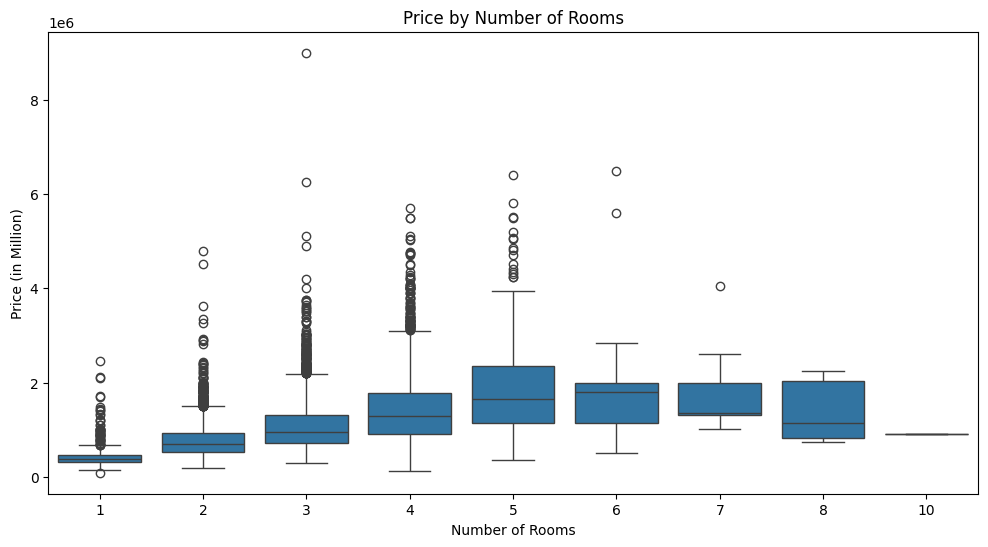

In [2342]:
# Boxplots by Number of Rooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rooms', y='Price', data = housing_data)
plt.title("Price by Number of Rooms")
plt.xlabel('Number of Rooms')
plt.ylabel('Price (in Million)')
plt.show()

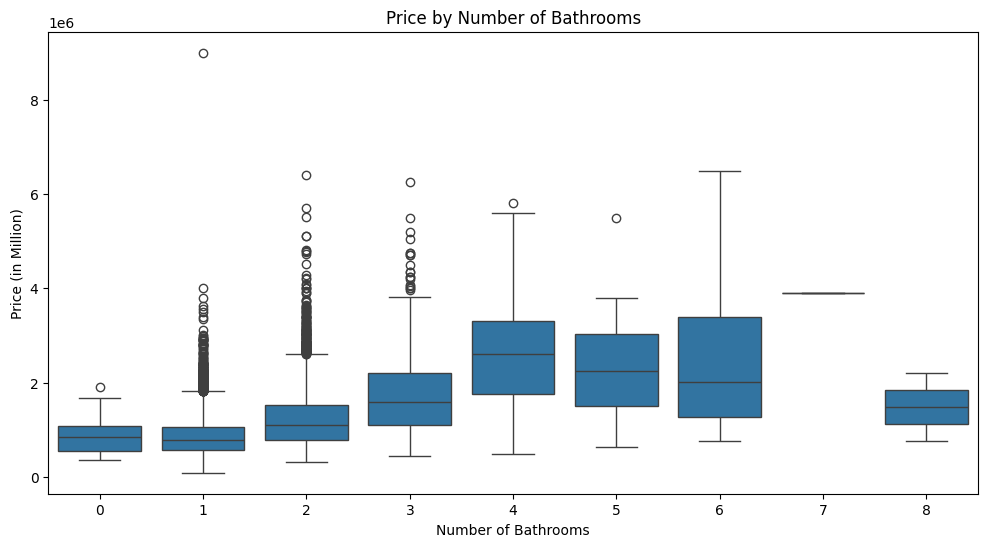

In [2343]:
# Boxplots by Number of Bathrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bathroom', y='Price', data=housing_data)
plt.title("Price by Number of Bathrooms")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Million)')
plt.show()

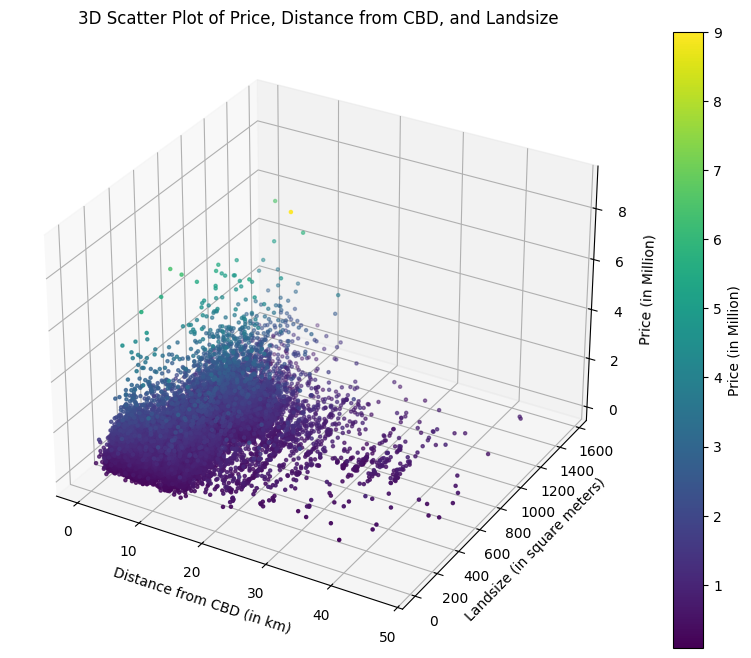

In [2344]:
# 3D Scatter Plot of Price, Distance from CBD, and Landsize
# Filter out rows with missing Landsize values
filtered_data = housing_data.dropna(subset=['Landsize'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with even smaller points
sc = ax.scatter(filtered_data['Distance'], filtered_data['Landsize'], filtered_data['Price'] / 1e6, c=filtered_data['Price'] / 1e6, cmap='viridis', s=5)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Price (in Million)')

# Set labels
ax.set_xlabel('Distance from CBD (in km)')
ax.set_ylabel('Landsize (in square meters)')
ax.set_zlabel('Price (in Million)')
ax.set_title('3D Scatter Plot of Price, Distance from CBD, and Landsize')

plt.show()

## 3. Feature Engineering

Number of Bedrooms - categories
- 0
- 1
- 2-3
- 4-5
- more than 5

In [2345]:
def categorize_bedroom2(value):
    if value == 0:
        return 'Group_0'
    elif value == 1:
        return 'Group_1'
    elif value in [2, 3]:
        return 'Group_2_3'
    elif value in [4, 5]:
        return 'Group_4_5'
    else:
        return 'Group_6_or_more'

housing_data['Bedroom2_Group'] = housing_data['Bedroom2'].apply(categorize_bedroom2)

housing_data = pd.get_dummies(housing_data, columns=['Bedroom2_Group'], prefix='Bedroom2', drop_first=False)
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1    1     202.0   
1 2016-02-04       2.5      3067         2         1    0     156.0   
2 2017-03-04       2.5      3067         3         2    0     134.0   
3 2017-03-04       2.5      3067         3         2    1      94.0   
4 2016-06-04       2.5      3067         3         1    2     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    118.737209       1960   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     99.674419       1900   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount  Log_Landsize  Log_Distance  Log_Property_Count  \
0           4019      5.313206      1.252763            8.299037   
1           4019      5.056246      1.252763            8.299037   
2           4019      4.905275      1.252763            8.299037   
3           4019      4.553877      1.252763            8.299037   
4           4019      4.795791      1.252763            8.299037   

   Log_Building_Area  BuildingArea_missing    time  time_cont  time_cos  \
0                NaN                     1  736074   0.076596  0.886410   
1           4.382027                     0  735984   0.000000  1.000000   
2           5.017280                     0  736361   0.320851 -0.430612   
3                NaN                     1  736361   0.320851 -0.430612   
4           4.962845                     0  736032   0.040851  0.967239   

    time_sq  Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  \
0  0.005867             False             False                True   
1  0.000000             False             False                True   
2  0.102945             False             False                True   
3  0.102945             False             False                True   
4  0.001669             False             False                True   

   Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  
0               False                     False  
1               False                     False  
2               False                     False  
3               False                     False  
4               False                     False

Number of Rooms - categories
- 1
- 2
- 3
- 4
- 5
- more than 6

In [2346]:
rooms_dummies = pd.DataFrame()

for i in range(1, 6):
    rooms_dummies[f'Room_{i}'] = (housing_data['Rooms'] == i).astype(int)

rooms_dummies['Room_6_or_more'] = (housing_data['Rooms'] >= 6).astype(int)

housing_data = pd.concat([housing_data, rooms_dummies], axis=1)

housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1    1     202.0   
1 2016-02-04       2.5      3067         2         1    0     156.0   
2 2017-03-04       2.5      3067         3         2    0     134.0   
3 2017-03-04       2.5      3067         3         2    1      94.0   
4 2016-06-04       2.5      3067         3         1    2     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    118.737209       1960   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     99.674419       1900   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount  Log_Landsize  Log_Distance  Log_Property_Count  \
0           4019      5.313206      1.252763            8.299037   
1           4019      5.056246      1.252763            8.299037   
2           4019      4.905275      1.252763            8.299037   
3           4019      4.553877      1.252763            8.299037   
4           4019      4.795791      1.252763            8.299037   

   Log_Building_Area  BuildingArea_missing    time  time_cont  time_cos  \
0                NaN                     1  736074   0.076596  0.886410   
1           4.382027                     0  735984   0.000000  1.000000   
2           5.017280                     0  736361   0.320851 -0.430612   
3                NaN                     1  736361   0.320851 -0.430612   
4           4.962845                     0  736032   0.040851  0.967239   

    time_sq  Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  \
0  0.005867             False             False                True   
1  0.000000             False             False                True   
2  0.102945             False             False                True   
3  0.102945             False             False                True   
4  0.001669             False             False                True   

   Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  \
0               False                     False       0       1       0   
1               False                     False       0       1       0   
2               False                     False       0       0       1   
3               False                     False       0       0       1   
4               False                     False       0       0       0   

   Room_4  Room_5  Room_6_or_more  
0       0       0               0  
1       0       0               0  
2       0       0               0  
3       0       0               0  
4       1       0               0

Car - categories
- 0
- 1
- 2
- 3 - 4
- more than 4

In [2347]:
def categorize_car_direct(value):
    if value == 0:
        return 0
    elif value == 1:
        return 1
    elif value == 2:
        return 2
    elif value in [3, 4]:
        return 3
    else:
        return 4

# Apply the direct mapping to create a new categorical column
housing_data['Car_Category'] = housing_data['Car'].apply(categorize_car_direct)

# Create dummies using this numerical mapping
car_dummies = pd.get_dummies(housing_data['Car_Category'], prefix='Car', drop_first=False)

housing_data = pd.concat([housing_data, car_dummies], axis=1)

housing_data.head()



Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1    1     202.0   
1 2016-02-04       2.5      3067         2         1    0     156.0   
2 2017-03-04       2.5      3067         3         2    0     134.0   
3 2017-03-04       2.5      3067         3         2    1      94.0   
4 2016-06-04       2.5      3067         3         1    2     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    118.737209       1960   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     99.674419       1900   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount  Log_Landsize  Log_Distance  Log_Property_Count  \
0           4019      5.313206      1.252763            8.299037   
1           4019      5.056246      1.252763            8.299037   
2           4019      4.905275      1.252763            8.299037   
3           4019      4.553877      1.252763            8.299037   
4           4019      4.795791      1.252763            8.299037   

   Log_Building_Area  BuildingArea_missing    time  time_cont  time_cos  \
0                NaN                     1  736074   0.076596  0.886410   
1           4.382027                     0  735984   0.000000  1.000000   
2           5.017280                     0  736361   0.320851 -0.430612   
3                NaN                     1  736361   0.320851 -0.430612   
4           4.962845                     0  736032   0.040851  0.967239   

    time_sq  Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  \
0  0.005867             False             False                True   
1  0.000000             False             False                True   
2  0.102945             False             False                True   
3  0.102945             False             False                True   
4  0.001669             False             False                True   

   Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  \
0               False                     False       0       1       0   
1               False                     False       0       1       0   
2               False                     False       0       0       1   
3               False                     False       0       0       1   
4               False                     False       0       0       0   

   Room_4  Room_5  Room_6_or_more  Car_Category  Car_0  Car_1  Car_2  Car_3  \
0       0       0               0             1  False   True  False  False   
1       0       0               0             0   True  False  False  False   
2       0       0               0             0   True  False  False  False   
3       0       0               0             1  False   True  False  False   
4       1       0               0             2  False  False   True  False   

   Car_4  
0  False  
1  False  
2  False  
3  False  
4  False

Bathrooms - categories
- 0
- 1
- 2
- 3
- more or equal to 4

In [2348]:
bathrooms_dummies = pd.DataFrame()

bathrooms_dummies['Bathroom_0'] = (housing_data['Bathroom'] == 0).astype(int)
bathrooms_dummies['Bathroom_1'] = (housing_data['Bathroom'] == 1).astype(int)
bathrooms_dummies['Bathroom_2'] = (housing_data['Bathroom'] == 2).astype(int)
bathrooms_dummies['Bathroom_3'] = (housing_data['Bathroom'] == 3).astype(int)
bathrooms_dummies['Bathroom_4_or_more'] = (housing_data['Bathroom'] >= 4).astype(int)

# Append the dummy variables to the original dataset
housing_data = pd.concat([housing_data, bathrooms_dummies], axis=1)

YearSold

In [2349]:
housing_data['Date'] = pd.to_datetime(housing_data['Date'], errors='coerce')

In [2350]:
housing_data['YearSold'] = housing_data['Date'].dt.year
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1    1     202.0   
1 2016-02-04       2.5      3067         2         1    0     156.0   
2 2017-03-04       2.5      3067         3         2    0     134.0   
3 2017-03-04       2.5      3067         3         2    1      94.0   
4 2016-06-04       2.5      3067         3         1    2     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    118.737209       1960   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     99.674419       1900   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount  Log_Landsize  Log_Distance  Log_Property_Count  \
0           4019      5.313206      1.252763            8.299037   
1           4019      5.056246      1.252763            8.299037   
2           4019      4.905275      1.252763            8.299037   
3           4019      4.553877      1.252763            8.299037   
4           4019      4.795791      1.252763            8.299037   

   Log_Building_Area  BuildingArea_missing    time  time_cont  time_cos  \
0                NaN                     1  736074   0.076596  0.886410   
1           4.382027                     0  735984   0.000000  1.000000   
2           5.017280                     0  736361   0.320851 -0.430612   
3                NaN                     1  736361   0.320851 -0.430612   
4           4.962845                     0  736032   0.040851  0.967239   

    time_sq  Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  \
0  0.005867             False             False                True   
1  0.000000             False             False                True   
2  0.102945             False             False                True   
3  0.102945             False             False                True   
4  0.001669             False             False                True   

   Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  \
0               False                     False       0       1       0   
1               False                     False       0       1       0   
2               False                     False       0       0       1   
3               False                     False       0       0       1   
4               False                     False       0       0       0   

   Room_4  Room_5  Room_6_or_more  Car_Category  Car_0  Car_1  Car_2  Car_3  \
0       0       0               0             1  False   True  False  False   
1       0       0               0             0   True  False  False  False   
2       0       0               0             0   True  False  False  False   
3       0       0               0             1  False   True  False  False   
4       1       0               0             2  False  False   True  False   

   Car_4  Bathroom_0  Bathroom_1  Bathroom_2  Bathroom_3  Bathroom_4_or_more  \
0  False           0           1           0           0                   0   
1  False           0           1           0           0                   0   
2  False           0           0           1           0                   0   
3  False           0           0           1           0                   0   
4  False           0           1           0           0               

HouseAge

In [2351]:
housing_data['HouseAge'] = housing_data['YearSold'] - housing_data['YearBuilt']

Grouping by Regionname - based on Average Housing Prices by Region Map

In [2352]:
region_groups = {
    'Northern Metropolitan': 'NSSE_Metropolitan',
    'Southern Metropolitan': 'NSSE_Metropolitan',
    'South-Eastern Metropolitan': 'NSSE_Metropolitan',
    'Eastern Metropolitan': 'E_Metropolitan',
    'Western Metropolitan': 'W_Metropolitan',
    'Western Victoria': 'WNE_Victoria',
    'Northern Victoria': 'WNE_Victoria',
    'Eastern Victoria': 'WNE_Victoria'
}

# Map the 'Regionname' column to the new region groups
housing_data['RegionGroup'] = housing_data['Regionname'].map(region_groups)

# Create dummy variables for the new RegionGroup
housing_data = pd.get_dummies(housing_data, columns=['RegionGroup'], drop_first=False)
housing_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-12-03       2.5      3067         2         1    1     202.0   
1 2016-02-04       2.5      3067         2         1    0     156.0   
2 2017-03-04       2.5      3067         3         2    0     134.0   
3 2017-03-04       2.5      3067         3         2    1      94.0   
4 2016-06-04       2.5      3067         3         1    2     120.0   

   BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
0    118.737209       1960   -37.7996    144.9984  Northern Metropolitan   
1     79.000000       1900   -37.8079    144.9934  Northern Metropolitan   
2    150.000000       1900   -37.8093    144.9944  Northern Metropolitan   
3     99.674419       1900   -37.7969    144.9969  Northern Metropolitan   
4    142.000000       2014   -37.8072    144.9941  Northern Metropolitan   

   Propertycount  Log_Landsize  Log_Distance  Log_Property_Count  \
0           4019      5.313206      1.252763            8.299037   
1           4019      5.056246      1.252763            8.299037   
2           4019      4.905275      1.252763            8.299037   
3           4019      4.553877      1.252763            8.299037   
4           4019      4.795791      1.252763            8.299037   

   Log_Building_Area  BuildingArea_missing    time  time_cont  time_cos  \
0                NaN                     1  736074   0.076596  0.886410   
1           4.382027                     0  735984   0.000000  1.000000   
2           5.017280                     0  736361   0.320851 -0.430612   
3                NaN                     1  736361   0.320851 -0.430612   
4           4.962845                     0  736032   0.040851  0.967239   

    time_sq  Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  \
0  0.005867             False             False                True   
1  0.000000             False             False                True   
2  0.102945             False             False                True   
3  0.102945             False             False                True   
4  0.001669             False             False                True   

   Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  \
0               False                     False       0       1       0   
1               False                     False       0       1       0   
2               False                     False       0       0       1   
3               False                     False       0       0       1   
4               False                     False       0       0       0   

   Room_4  Room_5  Room_6_or_more  Car_Category  Car_0  Car_1  Car_2  Car_3  \
0       0       0               0             1  False   True  False  False   
1       0       0               0             0   True  False  False  False   
2       0       0               0             0   True  False  False  False   
3       0       0               0             1  False   True  False  False   
4       1       0               0             2  False  False   True  False   

   Car_4  Bathroom_0  Bathroom_1  Bathroom_2  Bathroom_3  Bathroom_4_or_more  \
0  False           0           1           0           0                   0   
1  False           0           1           0           0                   0   
2  False           0           0           1           0                   0   
3  False           0           0           1           0                   0   
4  False           0           1           0           0               

Method - dummy

In [2353]:
housing_data = pd.get_dummies(housing_data, columns=['Method'], prefix='Method', drop_first=False)
housing_data.head()

Suburb           Address  Rooms Type      Price SellerG       Date  \
0  Abbotsford      85 Turner St      2    h  1480000.0  Biggin 2016-12-03   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0  Biggin 2016-02-04   
2  Abbotsford      5 Charles St      3    h  1465000.0  Biggin 2017-03-04   
3  Abbotsford  40 Federation La      3    h   850000.0  Biggin 2017-03-04   
4  Abbotsford       55a Park St      4    h  1600000.0  Nelson 2016-06-04   

   Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0       2.5      3067         2         1    1     202.0    118.737209   
1       2.5      3067         2         1    0     156.0     79.000000   
2       2.5      3067         3         2    0     134.0    150.000000   
3       2.5      3067         3         2    1      94.0     99.674419   
4       2.5      3067         3         1    2     120.0    142.000000   

   YearBuilt  Lattitude  Longtitude             Regionname  Propertycount  \
0       1960   -37.7996    144.9984  Northern Metropolitan           4019   
1       1900   -37.8079    144.9934  Northern Metropolitan           4019   
2       1900   -37.8093    144.9944  Northern Metropolitan           4019   
3       1900   -37.7969    144.9969  Northern Metropolitan           4019   
4       2014   -37.8072    144.9941  Northern Metropolitan           4019   

   Log_Landsize  Log_Distance  Log_Property_Count  Log_Building_Area  \
0      5.313206      1.252763            8.299037                NaN   
1      5.056246      1.252763            8.299037           4.382027   
2      4.905275      1.252763            8.299037           5.017280   
3      4.553877      1.252763            8.299037                NaN   
4      4.795791      1.252763            8.299037           4.962845   

   BuildingArea_missing    time  time_cont  time_cos   time_sq  \
0                     1  736074   0.076596  0.886410  0.005867   
1                     0  735984   0.000000  1.000000  0.000000   
2                     0  736361   0.320851 -0.430612  0.102945   
3                     1  736361   0.320851 -0.430612  0.102945   
4                     0  736032   0.040851  0.967239  0.001669   

   Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  Bedroom2_Group_4_5  \
0             False             False                True               False   
1             False             False                True               False   
2             False             False                True               False   
3             False             False                True               False   
4             False             False                True               False   

   Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  Room_4  Room_5  \
0                     False       0       1       0       0       0   
1                     False       0       1       0       0       0   
2                     False       0       0       1       0       0   
3                     False       0       0       1       0       0   
4                     False       0       0       0       1       0   

   Room_6_or_more  Car_Category  Car_0  Car_1  Car_2  Car_3  Car_4  \
0               0             1  False   True  False  False  False   
1               0             0   True  False  False  False  False   
2               0             0   True  False  False  False  False   
3               0             1  False   True  False  False  False   
4               0             2  False  False   True  False  False   

   Bathroom_0  Bathroom_1  Bathroom_2  Bathroom_3  Bathroom_4_or_more  \
0           0           1           0           0                   0   
1           0           1           0           0                   0   
2           0           0           1           0                   0   
3           0           0           1           0                   0   
4           0           1           0           0                   0   

   YearSold  HouseAge  RegionGro

**Type** - creating dummies

h- house,cottage,villa, semi,terrace; u- unit, duplex; t- townhouse 

In [2354]:
type_dummies = pd.get_dummies(housing_data['Type'], prefix='Type', drop_first=False)

housing_data = pd.concat([housing_data, type_dummies], axis=1)

housing_data.head()

Suburb           Address  Rooms Type      Price SellerG       Date  \
0  Abbotsford      85 Turner St      2    h  1480000.0  Biggin 2016-12-03   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0  Biggin 2016-02-04   
2  Abbotsford      5 Charles St      3    h  1465000.0  Biggin 2017-03-04   
3  Abbotsford  40 Federation La      3    h   850000.0  Biggin 2017-03-04   
4  Abbotsford       55a Park St      4    h  1600000.0  Nelson 2016-06-04   

   Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
0       2.5      3067         2         1    1     202.0    118.737209   
1       2.5      3067         2         1    0     156.0     79.000000   
2       2.5      3067         3         2    0     134.0    150.000000   
3       2.5      3067         3         2    1      94.0     99.674419   
4       2.5      3067         3         1    2     120.0    142.000000   

   YearBuilt  Lattitude  Longtitude             Regionname  Propertycount  \
0       1960   -37.7996    144.9984  Northern Metropolitan           4019   
1       1900   -37.8079    144.9934  Northern Metropolitan           4019   
2       1900   -37.8093    144.9944  Northern Metropolitan           4019   
3       1900   -37.7969    144.9969  Northern Metropolitan           4019   
4       2014   -37.8072    144.9941  Northern Metropolitan           4019   

   Log_Landsize  Log_Distance  Log_Property_Count  Log_Building_Area  \
0      5.313206      1.252763            8.299037                NaN   
1      5.056246      1.252763            8.299037           4.382027   
2      4.905275      1.252763            8.299037           5.017280   
3      4.553877      1.252763            8.299037                NaN   
4      4.795791      1.252763            8.299037           4.962845   

   BuildingArea_missing    time  time_cont  time_cos   time_sq  \
0                     1  736074   0.076596  0.886410  0.005867   
1                     0  735984   0.000000  1.000000  0.000000   
2                     0  736361   0.320851 -0.430612  0.102945   
3                     1  736361   0.320851 -0.430612  0.102945   
4                     0  736032   0.040851  0.967239  0.001669   

   Bedroom2_Group_0  Bedroom2_Group_1  Bedroom2_Group_2_3  Bedroom2_Group_4_5  \
0             False             False                True               False   
1             False             False                True               False   
2             False             False                True               False   
3             False             False                True               False   
4             False             False                True               False   

   Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  Room_4  Room_5  \
0                     False       0       1       0       0       0   
1                     False       0       1       0       0       0   
2                     False       0       0       1       0       0   
3                     False       0       0       1       0       0   
4                     False       0       0       0       1       0   

   Room_6_or_more  Car_Category  Car_0  Car_1  Car_2  Car_3  Car_4  \
0               0             1  False   True  False  False  False   
1               0             0   True  False  False  False  False   
2               0             0   True  False  False  False  False   
3               0             1  False   True  False  False  False   
4               0             2  False  False   True  False  False   

   Bathroom_0  Bathroom_1  Bathroom_2  Bathroom_3  Bathroom_4_or_more  \
0           0           1           0           0                   0   
1           0           1           0           0                   0   
2           0           0           1           0                   0   
3           0           0           1           0                   0   
4           0           1           0           0                   0   

   YearSold  HouseAge  RegionGro

Intercation Terms - Building Area * Region Group

In [2355]:
housing_data['BuildingArea*RegionGroup_E_Metropolitan'] = housing_data['BuildingArea']*housing_data['RegionGroup_E_Metropolitan']  
housing_data['BuildingArea*RegionGroup_NSSE_Metropolitan'] = housing_data['BuildingArea']*housing_data['RegionGroup_NSSE_Metropolitan']  
housing_data['BuildingArea*RegionGroup_WNE_Victoria'] = housing_data['BuildingArea']*housing_data['RegionGroup_WNE_Victoria']
housing_data['BuildingArea*RegionGroup_W_Metropolitan']= housing_data['BuildingArea']*housing_data['RegionGroup_W_Metropolitan']

## Test and Training Set

In [2356]:
from sklearn.model_selection import train_test_split

# Perform a stratified split on the 'Regionname' column
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42, stratify=housing_data['Regionname'])

# Display the size of the training and test sets
print(f"Training set size: {train_set.shape[0]}")
print(f"Test set size: {test_set.shape[0]}")

# Display the first few rows of the training set to confirm the split
train_set.head()

Training set size: 10504
Test set size: 2627


Suburb             Address  Rooms Type      Price  \
6173         Thornbury      7/9 Hammond St      2    u   466000.0   
5800          Sunshine     17 Hampshire Rd      3    h   702000.0   
10151      Murrumbeena  217 Murrumbeena Rd      4    h  1540000.0   
1823   Caulfield South     28 Ellington St      4    h  1960000.0   
10424          Ivanhoe    3/40 Magnolia Rd      3    u   880000.0   

             SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
6173        Woodards 2017-02-25       6.5      3071         2         1    1   
5800         Douglas 2016-09-10      12.6      3020         3         1    1   
10151       Woodards 2017-05-27      10.1      3163         4         2    2   
1823   hockingstuart 2016-04-16       9.3      3162         5         3    4   
10424          Barry 2017-07-08       7.8      3079         3         2    1   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
6173      909.0    186.860465       2004  -37.76330   145.01030   
5800      542.0    186.044186       1950  -37.79490   144.83030   
10151     589.0    199.000000       1920  -37.90017   145.06435   
1823      708.0    213.139535       1960  -37.89230   145.01770   
10424     252.0    145.093023       1960  -37.75842   145.05075   

                  Regionname  Propertycount  Log_Landsize  Log_Distance  \
6173   Northern Metropolitan           8870      6.813445      2.014903   
5800    Western Metropolitan           3755      6.297109      2.610070   
10151  Southern Metropolitan           4442      6.380123      2.406945   
1823   Southern Metropolitan           5051      6.563856      2.332144   
10424   Eastern Metropolitan           5549      5.533389      2.174752   

       Log_Property_Count  Log_Building_Area  BuildingArea_missing    time  \
6173             9.090543                NaN                     1  736979   
5800              8.23111                NaN                     1  736248   
10151            8.399085           5.298317                     0  737075   
1823             8.527539                NaN                     1  736368   
10424            8.621553                NaN                     1  736529   

       time_cont  time_cos   time_sq  Bedroom2_Group_0  Bedroom2_Group_1  \
6173    0.846809  0.571445  0.717085             False             False   
5800    0.224681  0.158415  0.050481             False             False   
10151   0.928511  0.900803  0.862132             False             False   
1823    0.326809 -0.464086  0.106804             False             False   
10424   0.463830 -0.974286  0.215138             False             False   

       Bedroom2_Group_2_3  Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  \
6173                 True               False                     False   
5800                 True               False                     False   
10151               False                True                     False   
1823                False                True                     False   
10424                True               False                     False   

       Room_1  Room_2  Room_3  Room_4  Room_5  Room_6_or_more  Car_Category  \
6173        0       1       0       0       0               0             1   
5800        0       0       1       0       0               0             1   
10151       0       0       0       1       0               0             2   
1823        0       0       0       1       0               0             3   
10424       0       0       1       0       0               0             1   

       Car_0  Car_1  Car_2  Car_3  Car_4  Bathroom_0  Bathroom_1  Bathroom_2  \
6173   False   True  False  False  False           0           1           0   
5800   False   True  False  False  False           0           1           0   
10151  False  False   True  False  False           0           0           1   
1823   False  False  False   True  False           0           0           0   
10424  False  

In [2357]:
# Save the training set to a CSV file
train_set.to_csv('train_set.csv', index=False)

# Save the test set to a CSV file
test_set.to_csv('test_set.csv', index=False)

## Dropping unnecessary columns for the analysis

In [2358]:
columns_to_drop = ['Suburb', 'Address','Rooms' ,'SellerG', 'Date', 'Postcode', 'time', 'Bedroom2', 'Bathroom', 'Log_Building_Area','Car' ,'Lattitude', 'Distance','Longtitude' ,'Landsize', 'Propertycount' ,'Longtitude', 'Type', 'Regionname', 'YearBuilt', 'Car_Category', 'BuildingArea_missing', 'Car_Category', 'YearSold']
train_set = train_set.drop(columns=columns_to_drop, errors='ignore')
test_set = test_set.drop(columns=columns_to_drop, errors='ignore')

train_set.head()

Price  BuildingArea  Log_Landsize  Log_Distance  \
6173    466000.0    186.860465      6.813445      2.014903   
5800    702000.0    186.044186      6.297109      2.610070   
10151  1540000.0    199.000000      6.380123      2.406945   
1823   1960000.0    213.139535      6.563856      2.332144   
10424   880000.0    145.093023      5.533389      2.174752   

       Log_Property_Count  time_cont  time_cos   time_sq  Bedroom2_Group_0  \
6173             9.090543   0.846809  0.571445  0.717085             False   
5800              8.23111   0.224681  0.158415  0.050481             False   
10151            8.399085   0.928511  0.900803  0.862132             False   
1823             8.527539   0.326809 -0.464086  0.106804             False   
10424            8.621553   0.463830 -0.974286  0.215138             False   

       Bedroom2_Group_1  Bedroom2_Group_2_3  Bedroom2_Group_4_5  \
6173              False                True               False   
5800              False                True               False   
10151             False               False                True   
1823              False               False                True   
10424             False                True               False   

       Bedroom2_Group_6_or_more  Room_1  Room_2  Room_3  Room_4  Room_5  \
6173                      False       0       1       0       0       0   
5800                      False       0       0       1       0       0   
10151                     False       0       0       0       1       0   
1823                      False       0       0       0       1       0   
10424                     False       0       0       1       0       0   

       Room_6_or_more  Car_0  Car_1  Car_2  Car_3  Car_4  Bathroom_0  \
6173                0  False   True  False  False  False           0   
5800                0  False   True  False  False  False           0   
10151               0  False  False   True  False  False           0   
1823                0  False  False  False   True  False           0   
10424               0  False   True  False  False  False           0   

       Bathroom_1  Bathroom_2  Bathroom_3  Bathroom_4_or_more  HouseAge  \
6173            1           0           0                   0        13   
5800            1           0           0                   0        66   
10151           0           1           0                   0        97   
1823            0           0           1                   0        56   
10424           0           1           0                   0        57   

       RegionGroup_E_Metropolitan  RegionGroup_NSSE_Metropolitan  \
6173                        False                           True   
5800                        False                          False   
10151                       False                           True   
1823                        False                           True   
10424                        True                          False   

       RegionGroup_WNE_Victoria  RegionGroup_W_Metropolitan  Method_PI  \
6173                      False                       False      False   
5800                      False                        True      False   
10151                     False                       False      False   
1823                      False                       False       True   
10424                     False                       False      False   

       Method_S  Method_SA  Method_SP  Method_VB  Type_h  Type_t  Type_u  \
6173       True      False      False      False   False   False    True   
5800       True      False      False      False    True   False   False   
10151      True      False      False      False    True   False   False   
1823      False      False      False      False    True   False   False   
10424     False      False      False       True   False   False    True   

       BuildingArea*RegionGroup_E_Metropolitan  \
6173                                  0.000000   
5800                

## Correlations

##### Numerical vs Numerical

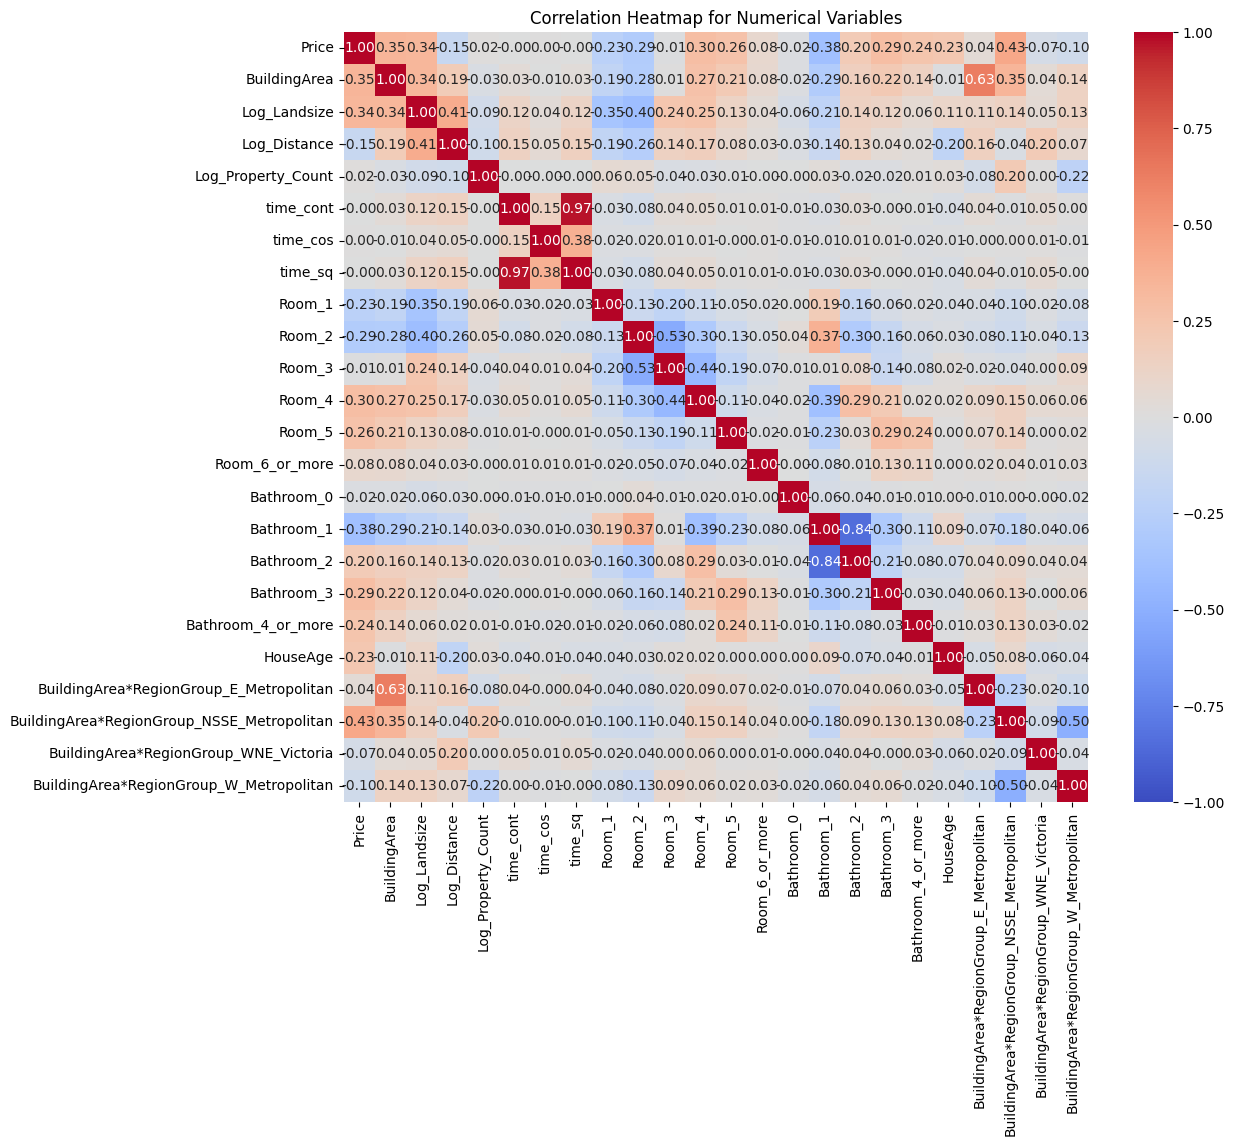

In [2359]:
numerical_cols = train_set.select_dtypes(include=[np.number]).columns
correlation_matrix = train_set[numerical_cols].corr()

# Heatmap of numerical correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

In [2360]:
high_corr_pairs = [
    (col1, col2, correlation_matrix.loc[col1, col2])
    for col1 in correlation_matrix.columns
    for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.6
]
high_corr_pairs=pd.DataFrame(high_corr_pairs)
high_corr_pairs

0  \
0                             BuildingArea   
1                                time_cont   
2                                  time_sq   
3                               Bathroom_1   
4                               Bathroom_2   
5  BuildingArea*RegionGroup_E_Metropolitan   

                                         1         2  
0  BuildingArea*RegionGroup_E_Metropolitan  0.625230  
1                                  time_sq  0.969021  
2                                time_cont  0.969021  
3                               Bathroom_2 -0.844747  
4                               Bathroom_1 -0.844747  
5                             BuildingArea  0.625230

##### Categorical vs Categorical

In [2361]:
categorical_cols = train_set.select_dtypes(include=["object", "category"]).columns


categorical_corr_optimized = {}
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(train_set[col1], train_set[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
            if p < 0.05:
                categorical_corr_optimized[(col1, col2)] = p

categorical_corr_optimized

{}

##### Numerical vs Categorical

In [2362]:
categorical_vs_numerical_corr_optimized = {}
for cat_col in categorical_cols:
    unique_values = train_set[cat_col].nunique()
    if unique_values <= 10: 
        for num_col in numerical_cols:
            anova_p = f_oneway(
                *[train_set[train_set[cat_col] == category][num_col].dropna()
                  for category in train_set[cat_col].unique()]
            ).pvalue
            if anova_p < 0.05:
                categorical_vs_numerical_corr_optimized[(cat_col, num_col)] = anova_p

categorical_vs_numerical_corr_optimized

{}

## Metrics

In [2363]:
metrics_df = pd.DataFrame(columns=['Model', 'RMSE'])

## Model's Benchmark
Choosing dummies as a benchmark to exclude from the model to avoid multicollinearity

In [2364]:
bedroom = 'Bedroom2_Group_0'
room = 'Room_1'
car = 'Car_0'
bathroom = 'Bathroom_0'
region = 'RegionGroup_E_Metropolitan'
region_interaction = 'BuildingArea*RegionGroup_E_Metropolitan'
method = 'Method_S'
type_property = 'Type_h'

##### HELPER FUNCTION - NAMES OF ALL THE COLUMNS

In [2365]:
concatenated_columns = ' + '.join(col for col in train_set.columns if col not in ['Price', f'{bedroom}', f'{room}', f'{car}', f'{bathroom}', f'{region}', f'{method}', f'{type_property}', f'{region_interaction}'])
concatenated_columns

'BuildingArea + Log_Landsize + Log_Distance + Log_Property_Count + time_cont + time_cos + time_sq + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Room_2 + Room_3 + Room_4 + Room_5 + Room_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + Bathroom_1 + Bathroom_2 + Bathroom_3 + Bathroom_4_or_more + HouseAge + RegionGroup_NSSE_Metropolitan + RegionGroup_WNE_Victoria + RegionGroup_W_Metropolitan + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u + BuildingArea*RegionGroup_NSSE_Metropolitan + BuildingArea*RegionGroup_WNE_Victoria + BuildingArea*RegionGroup_W_Metropolitan'

## 4. Linear Regression Model

Training

In [2366]:
model = smf.ols('Price ~ BuildingArea + Log_Landsize + Log_Distance + Log_Property_Count + time_cont + time_cos + time_sq + Bedroom2_Group_1 + Bedroom2_Group_2_3 + Bedroom2_Group_4_5 + Bedroom2_Group_6_or_more + Room_2 + Room_3 + Room_4 + Room_5 + Room_6_or_more + Car_1 + Car_2 + Car_3 + Car_4 + Bathroom_1 + Bathroom_2 + Bathroom_3 + Bathroom_4_or_more + HouseAge + RegionGroup_NSSE_Metropolitan + RegionGroup_WNE_Victoria + RegionGroup_W_Metropolitan + Method_PI + Method_SA + Method_SP + Method_VB + Type_t + Type_u + BuildingArea*RegionGroup_NSSE_Metropolitan + BuildingArea*RegionGroup_WNE_Victoria + BuildingArea*RegionGroup_W_Metropolitan', train_set).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     359.5
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:28:57   Log-Likelihood:            -1.5073e+05
No. Observations:               10504   AIC:                         3.015e+05
Df Residuals:                   10466   BIC:                         3.018e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Test

In [2367]:
model_name = "Linear Regression"
predictions = model.predict(test_set)
mse = mean_squared_error(test_set['Price'], predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

metrics_df = pd.concat([
    metrics_df,
    pd.DataFrame({'Model': [model_name], 'RMSE': [rmse]})
], ignore_index=True)

metrics_df

Root Mean Squared Error: 481240.5321489457


C:\Users\lasko\AppData\Local\Temp\ipykernel_23032\819591312.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


Model           RMSE
0  Linear Regression  481240.532149

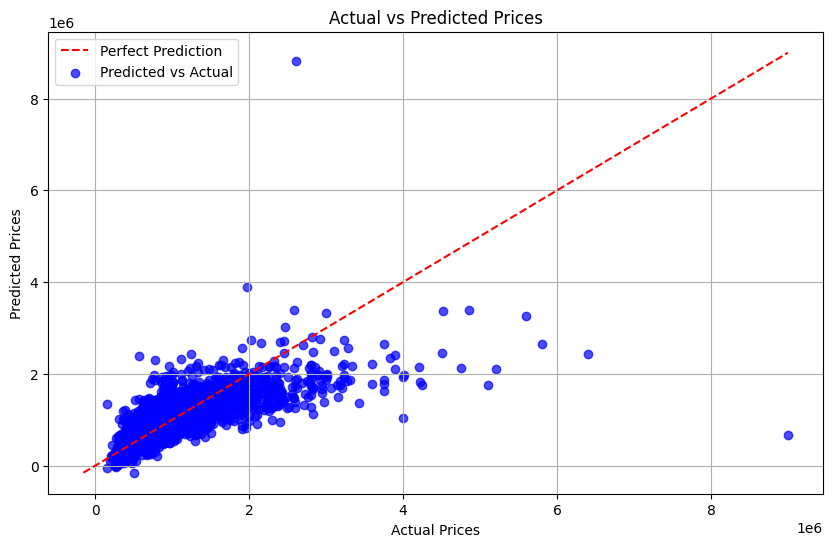

In [2368]:
plt.figure(figsize=(10, 6))
max_price = max(max(test_set['Price']), max(predictions))
min_price = min(min(test_set['Price']), min(predictions)) 
plt.plot([min_price, max_price], [min_price, max_price], color='red', linestyle='--', label='Perfect Prediction')
plt.scatter(test_set['Price'], predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

## 5. Predictive Model using MCMC

In [2369]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13131 entries, 0 to 13189
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Suburb                                      13131 non-null  object        
 1   Address                                     13131 non-null  object        
 2   Rooms                                       13131 non-null  int64         
 3   Type                                        13131 non-null  object        
 4   Price                                       13131 non-null  float64       
 5   SellerG                                     13131 non-null  object        
 6   Date                                        13131 non-null  datetime64[ns]
 7   Distance                                    13131 non-null  float64       
 8   Postcode                                    13131 non-null  Int64         
 9   Bedroom2   

### Creating interaction terms

In [2370]:
housing_data['BuildingArea*RegionGroup_E_Metropolitan'] = housing_data['BuildingArea']*housing_data['RegionGroup_E_Metropolitan']  
housing_data['BuildingArea*RegionGroup_NSSE_Metropolitan'] = housing_data['BuildingArea']*housing_data['RegionGroup_NSSE_Metropolitan']  
housing_data['BuildingArea*RegionGroup_WNE_Victoria'] = housing_data['BuildingArea']*housing_data['RegionGroup_WNE_Victoria']
housing_data['BuildingArea*RegionGroup_W_Metropolitan']= housing_data['BuildingArea']*housing_data['RegionGroup_W_Metropolitan']

### Defining target variable and predictors

In [2371]:
#'time','time_cont','time_cos','time_sq'

In [2372]:
predictors = ['Log_Landsize','Log_Distance','Log_Property_Count','Bedroom2_Group_1', 'Bedroom2_Group_2_3', 
              'Bedroom2_Group_4_5','Bedroom2_Group_6_or_more','Room_2','Room_3','Room_4',
              'Room_5','Room_6_or_more','Car_1','Car_2','Car_3','Car_4','Bathroom_1',
              'Bathroom_2','Bathroom_3','Bathroom_4_or_more','HouseAge','BuildingArea*RegionGroup_E_Metropolitan',
              'BuildingArea*RegionGroup_NSSE_Metropolitan','BuildingArea*RegionGroup_WNE_Victoria',
              'BuildingArea*RegionGroup_W_Metropolitan','Method_PI','Method_SA','Method_SP','Method_VB','Type_t','Type_u']

y=np.log(housing_data['Price'])

### Re-run Test and Train Sets

In [2373]:
from sklearn.model_selection import train_test_split

# Perform a stratified split on the 'Regionname' column
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42, stratify=housing_data['Regionname'])

# Display the size of the training and test sets
print(f"Training set size: {train_set.shape[0]}")
print(f"Test set size: {test_set.shape[0]}")

# Display the first few rows of the training set to confirm the split
train_set.head()

Training set size: 10504
Test set size: 2627


Suburb             Address  Rooms Type      Price  \
6173         Thornbury      7/9 Hammond St      2    u   466000.0   
5800          Sunshine     17 Hampshire Rd      3    h   702000.0   
10151      Murrumbeena  217 Murrumbeena Rd      4    h  1540000.0   
1823   Caulfield South     28 Ellington St      4    h  1960000.0   
10424          Ivanhoe    3/40 Magnolia Rd      3    u   880000.0   

             SellerG       Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
6173        Woodards 2017-02-25       6.5      3071         2         1    1   
5800         Douglas 2016-09-10      12.6      3020         3         1    1   
10151       Woodards 2017-05-27      10.1      3163         4         2    2   
1823   hockingstuart 2016-04-16       9.3      3162         5         3    4   
10424          Barry 2017-07-08       7.8      3079         3         2    1   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
6173      909.0    186.860465       2004  -37.76330   145.01030   
5800      542.0    186.044186       1950  -37.79490   144.83030   
10151     589.0    199.000000       1920  -37.90017   145.06435   
1823      708.0    213.139535       1960  -37.89230   145.01770   
10424     252.0    145.093023       1960  -37.75842   145.05075   

                  Regionname  Propertycount  Log_Landsize  Log_Distance  \
6173   Northern Metropolitan           8870      6.813445      2.014903   
5800    Western Metropolitan           3755      6.297109      2.610070   
10151  Southern Metropolitan           4442      6.380123      2.406945   
1823   Southern Metropolitan           5051      6.563856      2.332144   
10424   Eastern Metropolitan           5549      5.533389      2.174752   

       Log_Property_Count  Log_Building_Area  BuildingArea_missing    time  \
6173             9.090543                NaN                     1  736979   
5800              8.23111                NaN                     1  736248   
10151            8.399085           5.298317                     0  737075   
1823             8.527539                NaN                     1  736368   
10424            8.621553                NaN                     1  736529   

       time_cont  time_cos   time_sq  Bedroom2_Group_0  Bedroom2_Group_1  \
6173    0.846809  0.571445  0.717085             False             False   
5800    0.224681  0.158415  0.050481             False             False   
10151   0.928511  0.900803  0.862132             False             False   
1823    0.326809 -0.464086  0.106804             False             False   
10424   0.463830 -0.974286  0.215138             False             False   

       Bedroom2_Group_2_3  Bedroom2_Group_4_5  Bedroom2_Group_6_or_more  \
6173                 True               False                     False   
5800                 True               False                     False   
10151               False                True                     False   
1823                False                True                     False   
10424                True               False                     False   

       Room_1  Room_2  Room_3  Room_4  Room_5  Room_6_or_more  Car_Category  \
6173        0       1       0       0       0               0             1   
5800        0       0       1       0       0               0             1   
10151       0       0       0       1       0               0             2   
1823        0       0       0       1       0               0             3   
10424       0       0       1       0       0               0             1   

       Car_0  Car_1  Car_2  Car_3  Car_4  Bathroom_0  Bathroom_1  Bathroom_2  \
6173   False   True  False  False  False           0           1           0   
5800   False   True  False  False  False           0           1           0   
10151  False  False   True  False  False           0           0           1   
1823   False  False  False   True  False           0           0           0   
10424  False  

### Split dataset

In [2374]:
X_train = train_set[predictors].values  
y_train = np.log(train_set['Price'])

X_test = test_set[predictors].values
y_test = np.log(test_set['Price'])

### Standardizing Predictors

In [2375]:
#Fixing data type
X_test = X_test.astype(float)
X_train = X_train.astype(float)

#Standardizing predictors
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Adding intercept column

In [2376]:
#Adding intercept to column X
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print("Shape of X_train (with intercept):", X_train_scaled.shape)
print("Shape of X_test (with intercept):", X_test_scaled.shape)

Shape of X_train (with intercept): (10504, 32)
Shape of X_test (with intercept): (2627, 32)


### Defining Likelihood, Prior and Posterior functions

In [2377]:
#Predictive model
#Likelihood Function
def log_likelihood(y,X,beta,sigma2):
    n=len(y)
    mu=np.dot(X,beta) #Predicted mean
    residuals=y-mu
    return -0.5*n*np.log(2*np.pi*sigma2)-np.sum(residuals**2)/(2*sigma2)

#Priors
from scipy.stats import norm, invgamma

#Normal Prior for coefficients
def log_prior_beta(beta):
    return np.sum(norm.logpdf(beta,loc=0,scale=20)) #Mean=0, Var=10^2 # Wider prior to allow more variability

#Inverse-Gamma prior for the variance
def log_prior_sigma2(sigma2):
    return invgamma.logpdf(sigma2,a=2,scale=1)

#Posterior
def log_posterior(y, X, beta, sigma2):
    return log_likelihood(y, X, beta, sigma2)+log_prior_beta(beta)+log_prior_sigma2(sigma2)

### Gibbs-Sampling Algorithm

In [2378]:
# Gibbs Sampling Algorithm
def gibbs_sampling(y, X, iterations=10000, burn_in=2000):
    n, p = X.shape
    beta_samples = []
    sigma2_samples = []

    # Initialize parameters
    beta = np.zeros(p)
    sigma2 = 1

    # Hyperparameters for priors
    beta_prior_mean = np.zeros(p)
    beta_prior_variance = 10 ** 2  # Var = 20^2, as in the original prior
    alpha = 2  # Shape parameter for the inverse-gamma prior
    beta_scale = 1  # Scale parameter for the inverse-gamma prior

    for i in range(iterations):
        # Sample beta given sigma2
        beta_variance = np.linalg.inv((1 / beta_prior_variance) * np.eye(p) + (1 / sigma2) * np.dot(X.T, X))
        beta_mean = np.dot(beta_variance, np.dot(X.T, y) / sigma2)
        beta = np.random.multivariate_normal(beta_mean, beta_variance)

        # Sample sigma2 given beta
        residuals = y - np.dot(X, beta)
        alpha_post = alpha + n / 2
        beta_post = beta_scale + 0.5 * np.sum(residuals ** 2)
        sigma2 = 1 / np.random.gamma(alpha_post, 1 / beta_post)

        # Store samples
        beta_samples.append(beta)
        sigma2_samples.append(sigma2)

    # Convert lists to arrays
    beta_samples = np.array(beta_samples)
    sigma2_samples = np.array(sigma2_samples)

    # Apply burn-in
    beta_samples = beta_samples[burn_in:]
    sigma2_samples = sigma2_samples[burn_in:]

    return beta_samples, sigma2_samples

### Running the Algorithm

In [2379]:
# Run Gibbs Sampling
beta_samples, sigma2_samples = gibbs_sampling(y_train, X_train_scaled, iterations=10000, burn_in=2000)

# Compute posterior means
beta_mean = np.mean(beta_samples, axis=0)
sigma2_mean = np.mean(sigma2_samples)

print("Posterior Mean of coefficients:", beta_mean)
print("Posterior Mean of Variance:", sigma2_mean)

Posterior Mean of coefficients: [ 1.37471355e+01  8.39310454e-02 -2.00502660e-01 -1.36806242e-02
 -2.37309627e-02 -2.10899130e-02 -1.62333597e-02 -1.00725833e-02
  1.51830739e-01  2.39606585e-01  2.36652168e-01  1.36324189e-01
  5.59090620e-02  2.04394411e-03  5.09131518e-02  3.26809075e-02
  1.31229279e-02 -4.51792377e-02  3.56261891e-02  6.27276361e-02
  4.63999773e-02  5.73869622e-02  3.93362196e-02  9.69670844e-02
 -1.60190105e-02 -3.18522604e-02 -2.36362441e-02 -9.33913901e-04
 -2.33475274e-02 -1.41822150e-02 -3.67966610e-02 -1.05856074e-01]
Posterior Mean of Variance: 0.09959880386297186


### Checking convergence of parameters

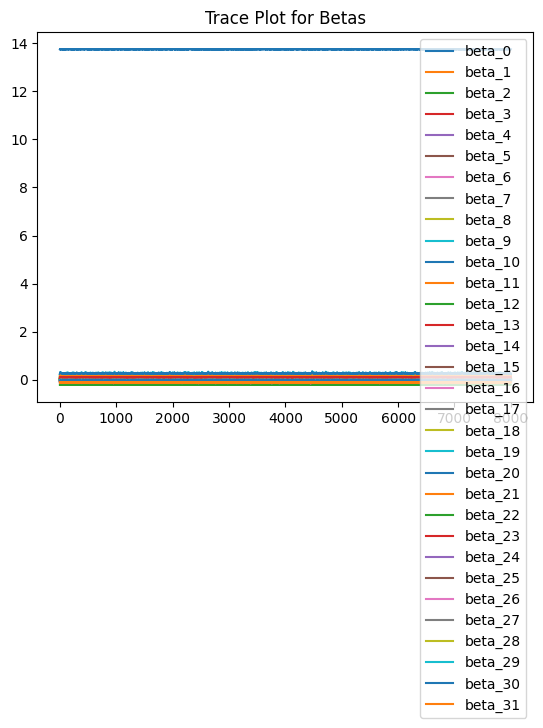

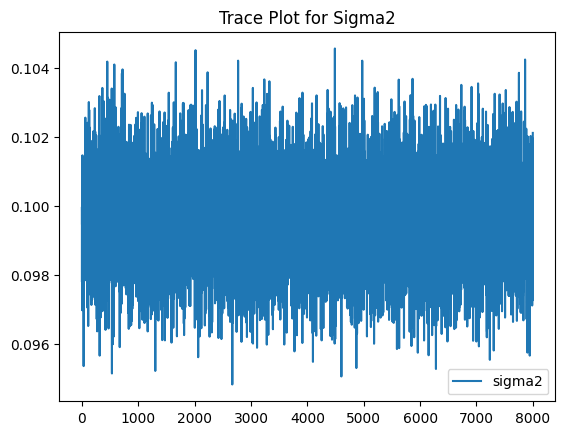

In [2380]:
def plot_traces_gibbs(beta_samples, sigma2_samples):
    # Plot beta traces
    for i in range(beta_samples.shape[1]):
        plt.plot(beta_samples[:, i], label=f'beta_{i}')
    plt.title("Trace Plot for Betas")
    plt.legend()
    plt.show()
    
    # Plot sigma2 trace
    plt.plot(sigma2_samples, label="sigma2")
    plt.title("Trace Plot for Sigma2")
    plt.legend()
    plt.show()

# Example usage
plot_traces_gibbs(beta_samples, sigma2_samples)

### Predicting Price

In [2381]:
# Predicting price using the mean of posterior samples
y_pred_log = np.dot(X_test_scaled, beta_mean)
y_pred_price = np.exp(y_pred_log)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(np.exp(y_test), y_pred_price)
mse = mean_squared_error(np.exp(y_test), y_pred_price)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 295066.2100274564
Mean Squared Error: 907552518982.2178


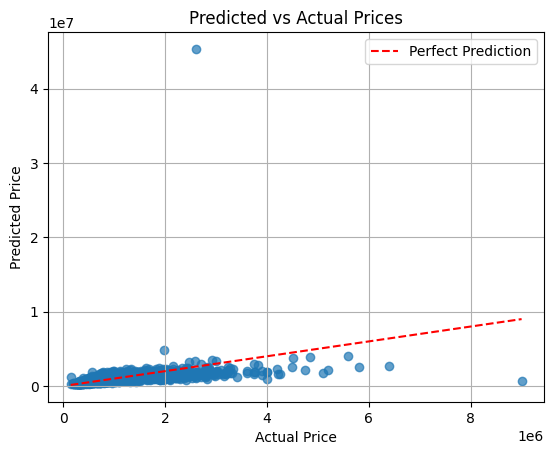

In [2382]:
#Scatter plot of Predicted vs. Actual Values
plt.scatter(np.exp(y_test),y_pred_price,alpha=0.7)
plt.plot([min(np.exp(y_test)),max(np.exp(y_test))],[min(np.exp(y_test)),max(np.exp(y_test))],color='red',linestyle='--',label='Perfect Prediction')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()
plt.show()

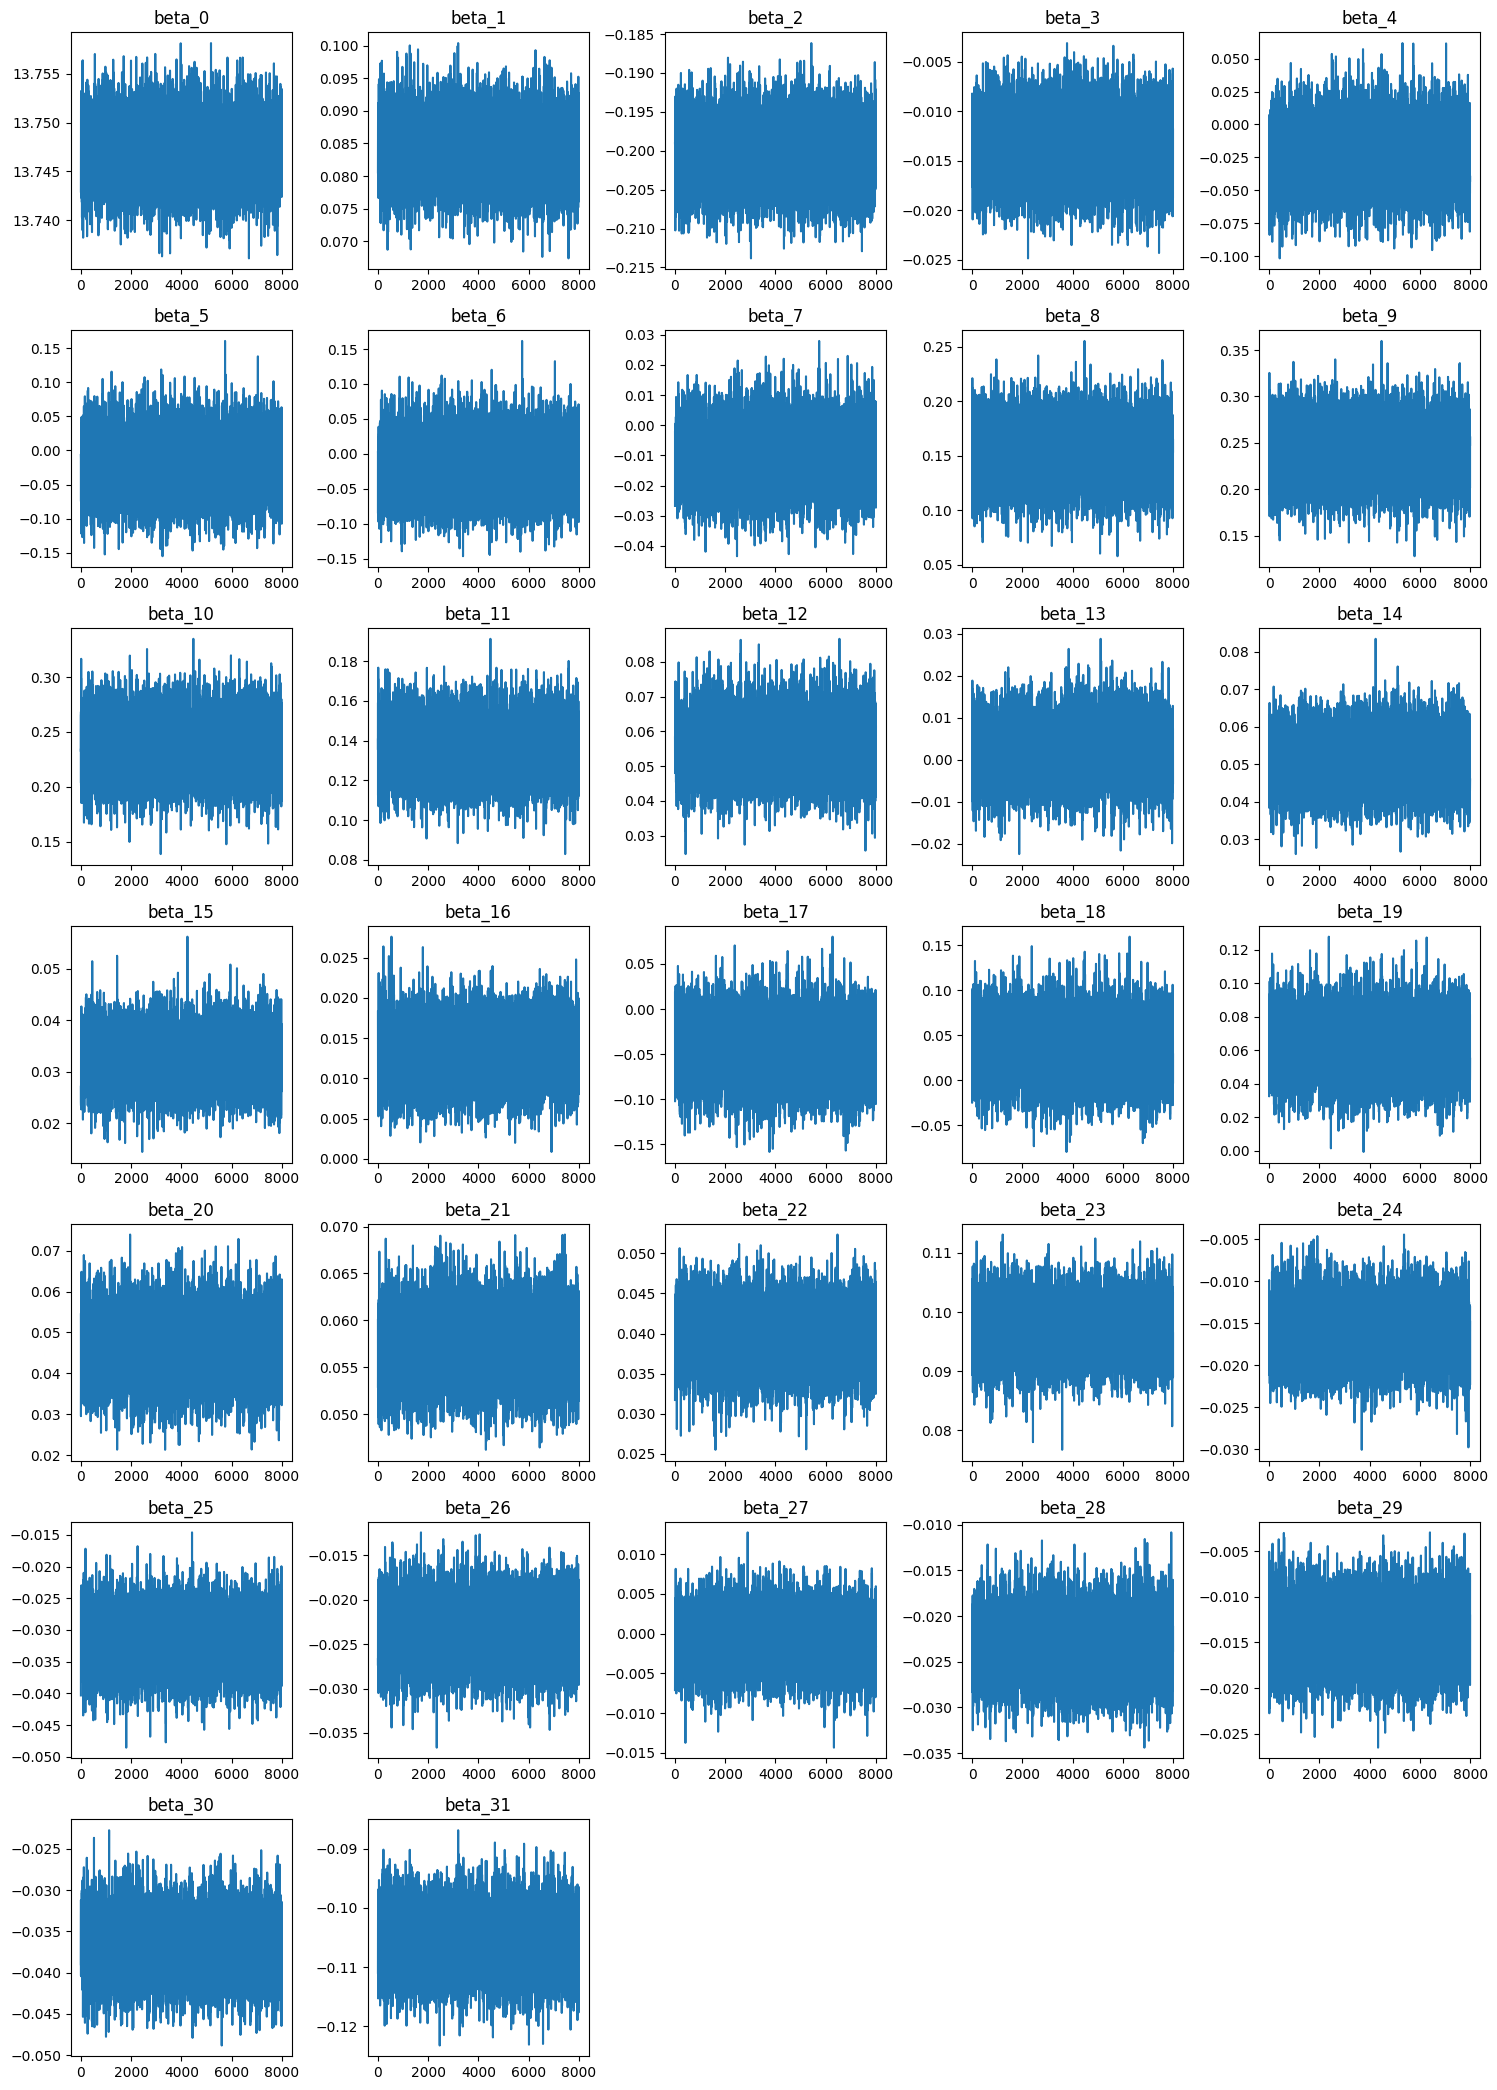

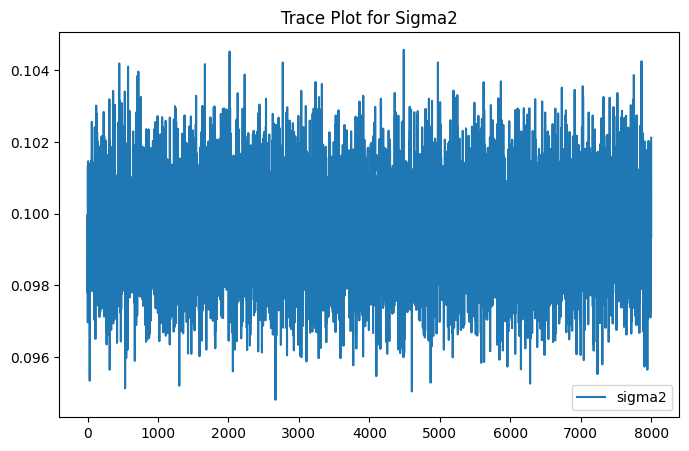

In [2383]:
import matplotlib.pyplot as plt

def plot_traces_gibbs(beta_samples, sigma2_samples):
    # Number of beta coefficients
    num_betas = beta_samples.shape[1]
    
    # Set up the grid for subplots
    n_cols = 5  # Number of plots per row
    n_rows = (num_betas + n_cols - 1) // n_cols  # Calculate the required number of rows
    
    # Create subplots for beta coefficients
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
    axes = axes.flatten()  # Flatten the axes for easy indexing
    
    for i in range(num_betas):
        axes[i].plot(beta_samples[:, i])
        axes[i].set_title(f'beta_{i}')
    
    # Hide any unused subplots
    for ax in axes[num_betas:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot sigma2 trace in a separate figure
    plt.figure(figsize=(8, 5))
    plt.plot(sigma2_samples, label="sigma2")
    plt.title("Trace Plot for Sigma2")
    plt.legend()
    plt.show()

# Example usage
plot_traces_gibbs(beta_samples, sigma2_samples)